# ■ final_comments_2 (댓글 감성 라벨 데이터 불러오기)

- 전처리는 이미 완료됨.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
final_comments2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/03.유튜브 댓글 최종 파일(감성분석라벨링완료)/final_comments_2.csv',encoding='cp949')

In [3]:
final_comments2.head()

author                                               text  \
0             박중근      2:49 왕따일수 없는 이유: 남편이 전요환 잡은 강인구(최창호가 안 도와줬나?)   
1      루돌프사슴코는빨간코                               요즘 누구 주위에 자살죽음 비슷하군.   
2  Maison de MiHo  강아지 광고가 더 감동~~~\n제가 그런 아이와 살고 있어서 ㅎ\n저희도 추운 겨울...   
3            MC댕댕                                            와 개꿀잼이네   
4          stella               오인경 너무 앵앵거려요... 목소리 좀 역할에 맞게 해주세여 ..   

           published_at drama_name channel_name    year  emotion_label  
0  2023-04-15T15:10:36Z      작은아씨들          김시선  2023.0              3  
1  2023-03-11T10:29:47Z      작은아씨들          김시선  2023.0             10  
2  2022-10-19T11:36:25Z      작은아씨들          김시선  2023.0             54  
3  2022-10-01T05:09:02Z      작은아씨들          김시선  2023.0             54  
4  2022-09-26T10:55:29Z      작은아씨들          김시선  2023.0              3

# ■ 환경 설정

In [4]:
# pandas는 데이터 조작 및 분석을 위한 라이브러리입니다. 복잡한 데이터를 쉽게 다루기 위해 사용됩니다.
import pandas as pd

# matplotlib.pyplot은 데이터를 차트나 플롯으로 시각화하기 위해 사용됩니다. 데이터 분석 결과를 시각적으로 표현할 때 필요합니다.
import matplotlib.pyplot as plt

# seaborn은 matplotlib을 기반으로 더 아름답고 복잡한 시각화를 가능하게 하는 라이브러리입니다. 통계적 데이터 시각화에 사용됩니다.
import seaborn as sns

# Counter는 요소의 개수를 셀 때 사용되며, 데이터의 항목별 빈도수를 쉽게 계산할 때 사용됩니다.
from collections import Counter

# re (정규 표현식)는 문자열에서 패턴 매칭이나 추출, 수정 등의 작업을 할 때 사용됩니다.
import re

# numpy는 과학 계산을 위한 라이브러리로, 다차원 배열과 행렬 연산에 사용됩니다. 데이터 분석이나 수치 계산 시 활용됩니다.
import numpy as np

# matplotlib의 font_manager는 시각화에서 글꼴 스타일을 관리하기 위해 사용됩니다. 특히 한글 표시를 위해 필요합니다.
import matplotlib.font_manager as fm
# 이 부분은 특정한 'Nanum' 폰트를 찾기 위한 코드입니다. 한글이 포함된 시각화에서 글꼴이 깨지는 것을 방지합니다.
[f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]

# 아래의 리눅스 명령어들은 나눔 글꼴을 시스템에 설치하는 과정입니다. 한글을 사용하는 그래프를 그릴 때 필요합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib의 기본 폰트를 나눔바른고딕으로 설정하는 코드입니다. 한글을 사용하는 시각화에서 글꼴이 제대로 표시되게 합니다.
plt.rc('font', family='NanumBarunGothic')
# 음수값이 그래프에서 마이너스 기호로 정확히 표시되게 합니다.
plt.rcParams['axes.unicode_minus'] = False
# 폰트 변경 후에는 캐시를 삭제해 새로운 설정이 적용되게 합니다.
!rm -rf ~/.cache/matplotlib/

# wordcloud는 단어의 빈도에 따라 단어의 크기가 다르게 표현되는 워드 클라우드를 생성할 때 사용됩니다.
from wordcloud import WordCloud

# transformers와 accelerate는 자연어 처리 작업을 위한 모델을 제공하고, 학습을 가속화하기 위해 사용됩니다.
!pip install transformers accelerate -U
from accelerate import Accelerator
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# torch 관련 라이브러리는 딥러닝 모델을 구성하고 학습하기 위한 PyTorch 프레임워크의 일부입니다.
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

# BERT 토크나이저는 문장을 모델이 이해할 수 있는 형태로 변환하기 위해 사용됩니다.
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
# BERT 모델은 자연어 처리를 위한 사전 훈련된 모델로, 여기서는 특정한 분류 작업을 위해 사용됩니다.
model = BertForSequenceClassification.from_pretrained("beomi/kcbert-base", num_labels=60)







######## 모델링 관련 나머지 ########
#!pip install transformers accelerate -U
#from accelerate import Accelerator
#from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments
#from torch.optim import AdamW
#from torch.utils.data import DataLoader
#from sklearn.model_selection import train_test_split
#import torch.optim as optim
#from torch.utils.data import DataLoader, TensorDataset
#import torch
#import torch.nn as nn
#from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
#from torch.utils.data import DataLoader, TensorDataset, random_split
#from transformers import BertTokenizer
#from keras.preprocessing.sequence import pad_sequences
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

(…)ultilingual-cased/resolve/main/vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

(…)ingual-cased/resolve/main/tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

(…)tilingual-cased/resolve/main/config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

(…)omi/kcbert-base/resolve/main/config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# ■ 스크립트 데이터 준비 : 불러오기, 컬럼 생성

## 1~11개

In [5]:
# 갯마을차차차라는 드라마 관련 데이터 파일의 경로를 지정합니다.
file_path1 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/갯마을차차차_영화와드라마.csv"
# 지정된 경로의 파일을 pandas의 DataFrame 형태로 읽어옵니다.
data1 = pd.read_csv(file_path1)

# 문자열 형태의 시간을 초 단위로 변환하는 함수를 정의합니다.
def time_to_seconds(time_str):
    # 문자열을 ":"으로 구분하여 리스트로 변환하고, 각 부분을 정수로 변환합니다.
    parts = list(map(int, time_str.split(":")))

    # 변환된 리스트의 길이에 따라 시간 형식을 처리합니다. (HH:MM:SS 또는 MM:SS)
    if len(parts) == 3:  # HH:MM:SS 형식일 경우
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS 형식일 경우
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        # 그 외의 형식은 처리할 수 없으므로 에러를 발생시킵니다.
        raise ValueError("Invalid time format!")

# 데이터에 드라마 이름을 '갯마을차차차'로 지정합니다.
data1['drama_name'] = "갯마을차차차"
# 해당 데이터의 채널 이름을 '영화와드라마'로 지정합니다.
data1['channel_name'] = "영화와드라마"
# 비디오 시간을 문자열로 직접 입력합니다. (아마도 전체 데이터에 대한 기본값 설정을 위함)
data1['video_time'] = "31:58"
# 'video_time' 열에 있는 시간 데이터를 초 단위로 변환하여 새로운 열 'video_time_seconds'에 저장합니다.
data1['video_time_seconds'] = data1['video_time'].apply(time_to_seconds)
# 예측 라벨을 저장하기 위한 새로운 열을 생성하고 초기값은 빈 문자열로 설정합니다.
data1['predicted_label'] = ""



# 괴이
file_path2 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/괴이_달빛뮤즈.csv"
data2 = pd.read_csv(file_path2)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data2['drama_name'] = "괴이"
data2['channel_name'] = "달빛뮤"
data2['video_time'] = "48:00"
data2['video_time_seconds'] = data2['video_time'].apply(time_to_seconds)
data2['predicted_label'] = ""

# 나빌레라
file_path3 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/나빌레라_달빛뮤즈.csv"
data3 = pd.read_csv(file_path3)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data3['drama_name'] = "나빌레라"
data3['channel_name'] = "달빛뮤즈"
data3['video_time'] = "50:34"
data3['video_time_seconds'] = data3['video_time'].apply(time_to_seconds)
data3['predicted_label'] = ""


# 당신의운명을쓰고있습니다
file_path4 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/당신의운명을쓰고있습니다_고몽.csv"
data4 = pd.read_csv(file_path4)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data4['drama_name'] = "당신의운명을쓰고있습니다"
data4['channel_name'] = "고몽"
data4['video_time'] = "18:58"
data4['video_time_seconds'] = data4['video_time'].apply(time_to_seconds)
data4['predicted_label'] = ""


# 덕구이즈백
file_path5 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/덕구이즈백_고몽.csv"
data5 = pd.read_csv(file_path5)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data5['drama_name'] = "덕구이즈백"
data5['channel_name'] = "고몽"
data5['video_time'] = "15:41"
data5['video_time_seconds'] = data5['video_time'].apply(time_to_seconds)
data5['predicted_label'] = ""


# 링크먹고사랑하라죽이게

file_path6 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/링크먹고사랑하라죽이게_고몽.csv"
data6 = pd.read_csv(file_path6)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data6['drama_name'] = "링크먹고사랑하라죽이게"
data6['channel_name'] = "고몽"
data6['video_time'] = "19:56"
data6['video_time_seconds'] = data6['video_time'].apply(time_to_seconds)
data6['predicted_label'] = ""

# 마녀식당으로오세요

file_path7 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/마녀식당으로오세요_고몽.csv"
data7 = pd.read_csv(file_path7)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data7['drama_name'] = "마녀식당으로오세요"
data7['channel_name'] = "고몽"
data7['video_time'] = "16:18"
data7['video_time_seconds'] = data7['video_time'].apply(time_to_seconds)
data7['predicted_label'] = ""


# 마인

file_path8 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/마인_티비앤드라마.csv"
data8 = pd.read_csv(file_path8)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data8['drama_name'] = "마인"
data8['channel_name'] = "티비앤드라마"
data8['video_time'] = "10:49"
data8['video_time_seconds'] = data8['video_time'].apply(time_to_seconds)
data8['predicted_label'] = ""

# 미씽

file_path9 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/미씽_디글.csv"
data9 = pd.read_csv(file_path9)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data9['drama_name'] = "미씽"
data9['channel_name'] = "디글"
data9['video_time'] = "1:13:17"
data9['video_time_seconds'] = data9['video_time'].apply(time_to_seconds)
data9['predicted_label'] = ""

# 민트컨디션

file_path10 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/민트컨디션_고몽.csv"
data10 = pd.read_csv(file_path10)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data10['drama_name'] = "민트컨디션"
data10['channel_name'] = "고몽"
data10['video_time'] = "15:41"
data10['video_time_seconds'] = data10['video_time'].apply(time_to_seconds)
data10['predicted_label'] = ""

# 바벨신드롬

file_path11 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/바벨신드롬_티비앤드라마.csv"
data11 = pd.read_csv(file_path11)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data11['drama_name'] = "바벨신드롬"
data11['channel_name'] = "티비앤드라마"
data11['video_time'] = "3:29"
data11['video_time_seconds'] = data11['video_time'].apply(time_to_seconds)
data11['predicted_label'] = ""


## 12 ~ 22개

In [6]:
# 박성실씨의사차산업혁명
file_path12 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/박성실씨의사차산업혁명_고몽.csv"
data12 = pd.read_csv(file_path12)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data12['drama_name'] = "박성실씨의사차산업혁명"
data12['channel_name'] = "고몽"
data12['video_time'] = "12:14"
data12['video_time_seconds'] = data12['video_time'].apply(time_to_seconds)
data12['predicted_label'] = ""


# 배드앤크레이지
file_path13 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/배드앤크레이지_고몽.csv"
data13 = pd.read_csv(file_path13)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data13['drama_name'] = "배드앤크레이지"
data13['channel_name'] = "고몽"
data13['video_time'] = "29:35"
data13['video_time_seconds'] = data13['video_time'].apply(time_to_seconds)
data13['predicted_label'] = ""

# 불가살
file_path14 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/불가살_구불.csv"
data14 = pd.read_csv(file_path14)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data14['drama_name'] = "불가살"
data14['channel_name'] = "구불"
data14['video_time'] = "4:50:55"
data14['video_time_seconds'] = data14['video_time'].apply(time_to_seconds)
data14['predicted_label'] = ""


# 블라인드
file_path16 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/블라인드_캡틴라미.csv"
data16 = pd.read_csv(file_path1)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data16['drama_name'] = "블라인드"
data16['channel_name'] = "캡틴라미"
data16['video_time'] = "20:53"
data16['video_time_seconds'] = data16['video_time'].apply(time_to_seconds)
data16['predicted_label'] = ""


# 빅마우스

file_path17 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/빅마우스_어바웃타임.csv"
data17 = pd.read_csv(file_path1)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data17['drama_name'] = "빅마우스"
data17['channel_name'] = "어바웃타임"
data17['video_time'] = "4:50:33"
data17['video_time_seconds'] = data17['video_time'].apply(time_to_seconds)
data17['predicted_label'] = ""

# 빈센조

file_path18 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/빈센조_디글.csv"
data18 = pd.read_csv(file_path18)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data18['drama_name'] = "빈센조"
data18['channel_name'] = "디글"
data18['video_time'] = "1:34:25"
data18['video_time_seconds'] = data18['video_time'].apply(time_to_seconds)
data18['predicted_label'] = ""


# 살인자쇼핑

file_path19 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/살인자의쇼핑목록_달빛뮤즈.csv"
data19 = pd.read_csv(file_path19)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data19['drama_name'] = "살인자의쇼핑목록"
data19['channel_name'] = "달빛뮤즈"
data19['video_time'] = "19:59"
data19['video_time_seconds'] = data19['video_time'].apply(time_to_seconds)
data19['predicted_label'] = ""

# 슈룹

file_path20 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/슈룹_티비앤드라마.csv"
data20 = pd.read_csv(file_path20)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data20['drama_name'] = "슈룹"
data20['channel_name'] = "티비앤드라마"
data20['video_time'] = "19:57"
data20['video_time_seconds'] = data20['video_time'].apply(time_to_seconds)
data20['predicted_label'] = ""

# 스물다섯스물하나

file_path21 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/스물다섯스물하나_구불.csv"
data21 = pd.read_csv(file_path21)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data21['drama_name'] = "스물다섯스물하나"
data21['channel_name'] = "구불"
data21['video_time'] = "20:29"
data21['video_time_seconds'] = data21['video_time'].apply(time_to_seconds)
data21['predicted_label'] = ""

# 스위트홈

file_path22 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/스위트홈_공작왕.csv"
data22 = pd.read_csv(file_path22)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data22['drama_name'] = "스위트홈"
data22['channel_name'] = "공작왕"
data22['video_time'] = "38:07"
data22['video_time_seconds'] = data22['video_time'].apply(time_to_seconds)
data22['predicted_label'] = ""


## 나머지

In [7]:
# 스톡오브하이스쿨

file_path23 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/스톡오브하이스쿨_캡틴라미.csv"
data23 = pd.read_csv(file_path23)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data23['drama_name'] = "스톡오브하이스쿨"
data23['channel_name'] = "캡틴라미"
data23['video_time'] = "24:54"
data23['video_time_seconds'] = data23['video_time'].apply(time_to_seconds)
data23['predicted_label'] = ""


# 아다마스

file_path24 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/아다마스_달빛뮤즈.csv"
data24 = pd.read_csv(file_path13)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data24['drama_name'] = "아다마스"
data24['channel_name'] = "달빛뮤즈"
data24['video_time'] = "21:00"
data24['video_time_seconds'] = data24['video_time'].apply(time_to_seconds)
data24['predicted_label'] = ""


# 아파트

file_path25 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/아파트는 아름다워_달빛뮤즈.csv"
data25 = pd.read_csv(file_path25)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data25['drama_name'] = "아파트는아름다워"
data25['channel_name'] = "달빛뮤즈"
data25['video_time'] = "20:44"
data25['video_time_seconds'] = data25['video_time'].apply(time_to_seconds)
data25['predicted_label'] = ""


# 오피스

file_path26 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/오피스에서뭐하쉐얼.csv"
data26 = pd.read_csv(file_path26)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data26['drama_name'] = "오피스에서뭐하쉐얼"
data26['channel_name'] = "티비앤드라마"
data26['video_time'] = "2:18"
data26['video_time_seconds'] = data26['video_time'].apply(time_to_seconds)
data26['predicted_label'] = ""


# 조선정신과

file_path27 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/조선정신과의사유세풍_달빛뮤즈.csv"
data27 = pd.read_csv(file_path27)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data27['drama_name'] = "조선정신과의사유세풍"
data27['channel_name'] = "달빛뮤즈"
data27['video_time'] = "20:59"
data27['video_time_seconds'] = data27['video_time'].apply(time_to_seconds)
data27['predicted_label'] = ""


# 좋아

file_path28 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/좋아하면울리는_신기누설.csv"
data28 = pd.read_csv(file_path28)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data28['drama_name'] = "좋아하면울리는"
data28['channel_name'] = "신기누설"
data28['video_time'] = "31:31"
data28['video_time_seconds'] = data28['video_time'].apply(time_to_seconds)
data28['predicted_label'] = ""


# 지리산

file_path29 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/지리산_티비앤드라마.csv"
data29 = pd.read_csv(file_path1)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data29['drama_name'] = "지리산"
data29['channel_name'] = "티비앤드라마"
data29['video_time'] = "8:20"
data29['video_time_seconds'] = data29['video_time'].apply(time_to_seconds)
data29['predicted_label'] = ""


# 커넥트

file_path31 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/커넥트_캡틴라미.csv"
data31 = pd.read_csv(file_path31)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data31['drama_name'] = "커넥트"
data31['channel_name'] = "캡틴라미"
data31['video_time'] = "56:56"
data31['video_time_seconds'] = data31['video_time'].apply(time_to_seconds)
data31['predicted_label'] = ""


# 킹덤

file_path32 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/킹덤_공작왕티비.csv"
data32 = pd.read_csv(file_path32)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data32['drama_name'] = "킹덤"
data32['channel_name'] = "공작왕"
data32['video_time'] = "1:02:39"
data32['video_time_seconds'] = data32['video_time'].apply(time_to_seconds)
data32['predicted_label'] = ""


# 환혼

file_path33 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/티비앤드라마_환혼.csv"
data33 = pd.read_csv(file_path33)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data33['drama_name'] = "환혼"
data33['channel_name'] = "티비앤드라마"
data33['video_time'] = "1:14:20"
data33['video_time_seconds'] = data33['video_time'].apply(time_to_seconds)
data33['predicted_label'] = ""


# 해피니스

file_path34 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/해피니스_고몽.csv"
data34 = pd.read_csv(file_path1)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data34['drama_name'] = "해피니스"
data34['channel_name'] = "고몽"
data34['video_time'] = "1:09:39"
data34['video_time_seconds'] = data34['video_time'].apply(time_to_seconds)
data34['predicted_label'] = ""


# 형사록

file_path35 = "/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/형사록_어바웃타임.csv"
data35 = pd.read_csv(file_path35)

def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(":")))

    if len(parts) == 3:  # HH:MM:SS format
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:  # MM:SS format
        minutes, seconds = parts
        return minutes * 60 + seconds
    else:
        raise ValueError("Invalid time format!")

data35['drama_name'] = "형사록"
data35['channel_name'] = "어바웃타임"
data35['video_time'] = "1:50:15"
data35['video_time_seconds'] = data35['video_time'].apply(time_to_seconds)
data35['predicted_label'] = ""

In [8]:
dragon_drama_script = pd.concat([data1, data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data16,data17,data18,data19,data20,data21,data22,data23,data24,data25,data6,data27,data28,data29,data31,data32,data33,data34,data35], ignore_index=True)


# ■ 스크립트 데이터 탐색

In [9]:
# 스크립트 확인
dragon_drama_script.head()

dragon_drama_script.tail()

Start_script  End_script        Text_script drama_name channel_name  \
26425      6591.179    6595.080         이로 말할 수 없이        형사록        어바웃타임   
26426      6592.739    6596.880  분노에 찬 등록이 형사록이 아직        형사록        어바웃타임   
26427      6595.080    6598.450             미결된 채로        형사록        어바웃타임   
26428      6596.880    6610.719        시즌1이 마무리됩니다        형사록        어바웃타임   
26429      6598.450    6610.719               [음악]        형사록        어바웃타임   

      video_time  video_time_seconds predicted_label  
26425    1:50:15                6615                  
26426    1:50:15                6615                  
26427    1:50:15                6615                  
26428    1:50:15                6615                  
26429    1:50:15                6615

In [10]:
# 비어있는 행 확인

missing_drama_name = dragon_drama_script['drama_name'].isnull().sum()
missing_channel_name = dragon_drama_script['channel_name'].isnull().sum()
missing_video_time = dragon_drama_script['video_time'].isnull().sum()

print(f"Missing values in 'drama_name': {missing_drama_name}")
print(f"Missing values in 'channel_name': {missing_channel_name}")
print(f"Missing values in 'video_time': {missing_video_time}")


Missing values in 'drama_name': 0
Missing values in 'channel_name': 0
Missing values in 'video_time': 0


In [11]:
# 모든 컬럼 결측치 확인
print(dragon_drama_script.isnull().sum())

Start_script          0
End_script            0
Text_script           0
drama_name            0
channel_name          0
video_time            0
video_time_seconds    0
predicted_label       0
dtype: int64


In [12]:
# 기본 정보
print(dragon_drama_script.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26430 entries, 0 to 26429
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Start_script        26430 non-null  float64
 1   End_script          26430 non-null  float64
 2   Text_script         26430 non-null  object 
 3   drama_name          26430 non-null  object 
 4   channel_name        26430 non-null  object 
 5   video_time          26430 non-null  object 
 6   video_time_seconds  26430 non-null  int64  
 7   predicted_label     26430 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.6+ MB
None


In [13]:
# 수치화된 값 기본 통계
print(dragon_drama_script.describe())

       Start_script    End_script  video_time_seconds
count  26430.000000  26430.000000        26430.000000
mean    3239.588579   3244.383350         6957.790995
std     4241.089754   4240.983376         6816.157908
min        0.000000      2.400000          209.000000
25%      647.537500    652.500000         1260.000000
50%     1411.030000   1415.545000         3416.000000
75%     3568.444750   3572.781750        17455.000000
max    17453.100000  17455.850000        17455.000000


In [14]:
# 특정 컬럼의 고유한 값과 빈도수 확인
for column in dragon_drama_script.columns:
    print(f"{column} unique values: {dragon_drama_script[column].nunique()}")

Start_script unique values: 21872
End_script unique values: 19846
Text_script unique values: 19741
drama_name unique values: 32
channel_name unique values: 11
video_time unique values: 31
video_time_seconds unique values: 31
predicted_label unique values: 1


## 데이터 탐색 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50501 (\N{HANGUL SYLLABLE AG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51004 (\N{HANGUL SYLLABLE EU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

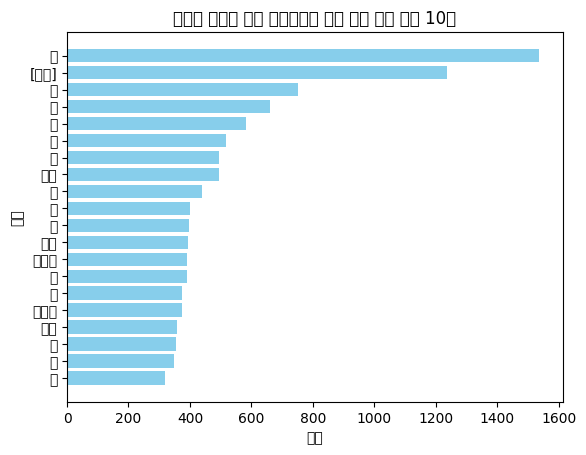

In [15]:
# 텍스트 데이터에서 모든 단어 추출
words = ' '.join(dragon_drama_script['Text_script']).split()
word_counts = Counter(words)
# 가장 많이 사용된 30개 단어 출력
common_words = word_counts.most_common(20)
# 시각화
word_labels, word_values = zip(*common_words)
plt.barh(word_labels, word_values, color='skyblue')
plt.xlabel('빈도')
plt.ylabel('단어')
plt.title('드라마 줄거리 요약 채널에서의 주요 단어 빈도 상위 10개')
plt.gca().invert_yaxis()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


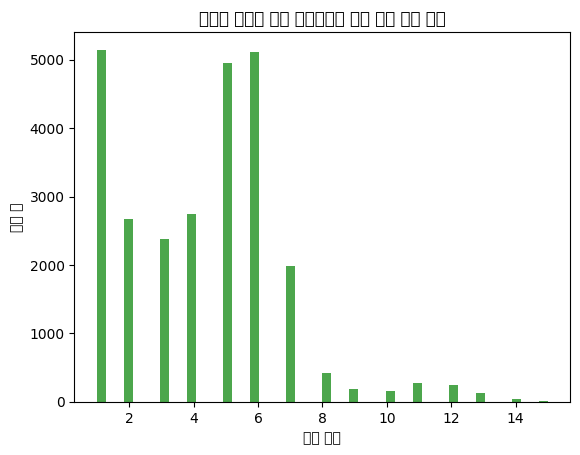

In [16]:
# 문장 길이 계산
sentence_lengths = [len(sentence.split()) for sentence in dragon_drama_script['Text_script']]

# 시각화
plt.hist(sentence_lengths, bins=50, color='green', alpha=0.7)
plt.xlabel('문장 길이')
plt.ylabel('문장 수')
plt.title('드라마 줄거리 요약 채널에서의 주요 문장 길이 분포')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47805 (\N{HANGUL SYLLABLE MONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

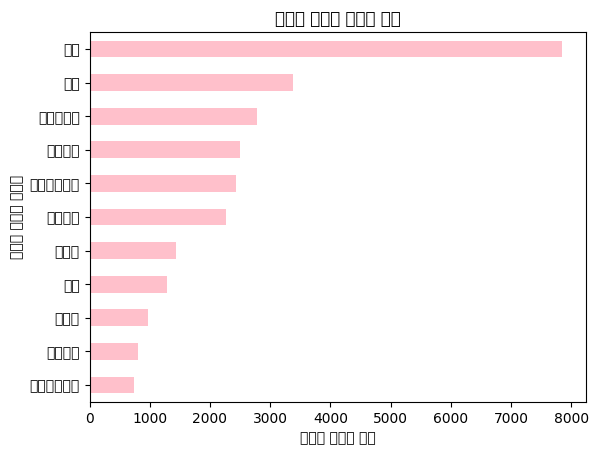

In [17]:
# 채널의 분포 계산 및 시각화

channel_counts = dragon_drama_script['channel_name'].value_counts()
channel_counts.plot(kind='barh', color='pink')
plt.xlabel('드라마 줄거리 빈도')
plt.ylabel('드라마 줄거리 채널명')
plt.title('드라마 줄거리 채널의 분포')
plt.gca().invert_yaxis()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

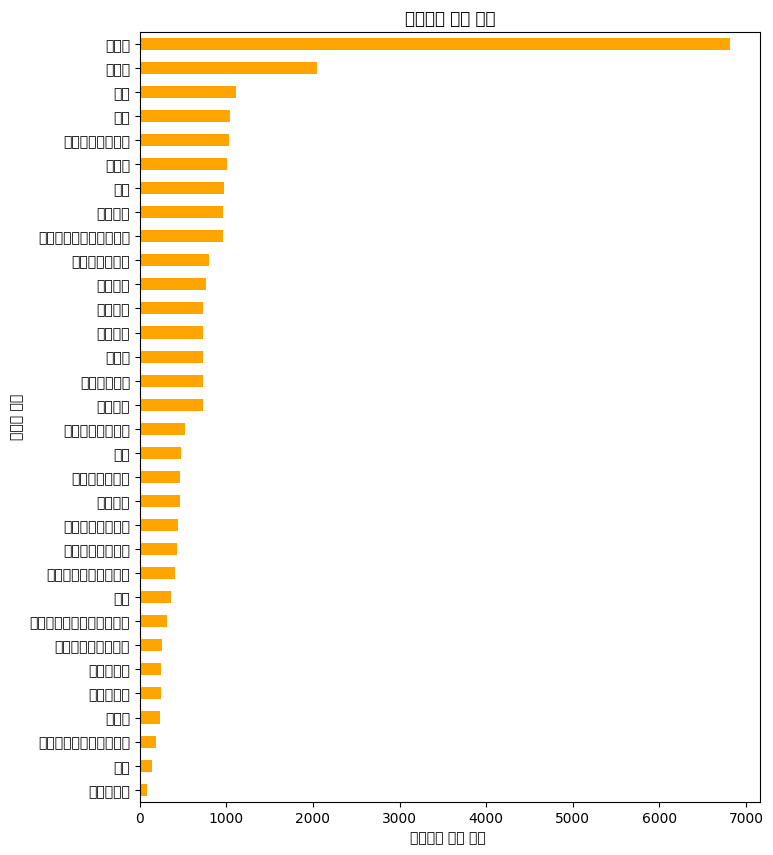

In [18]:
plt.figure(figsize=(8, 10))  # 8은 가로 길이, 10은 세로 길이

drama_subtitle_counts = dragon_drama_script['drama_name'].value_counts()
drama_subtitle_counts.plot(kind='barh', color='orange')
plt.xlabel('드라마별 자막 분포 ')
plt.ylabel('드라마 제목')
plt.title('드라마별 자막 분포')
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50501 (\N{HANGUL SYLLABLE AG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47952 (\N{HANGUL SYLLABLE MWEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51096 (\N{HANGUL SYLLABLE JAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

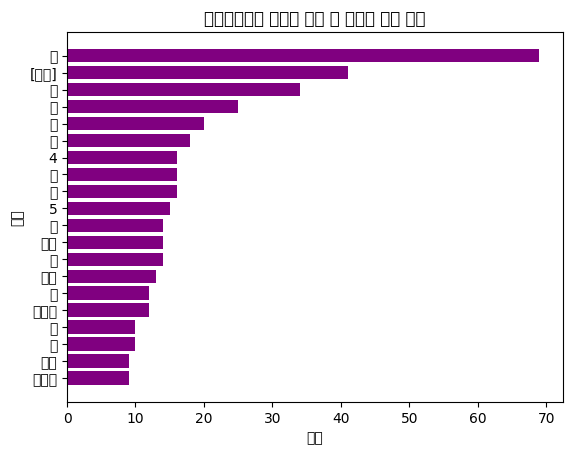

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48744 (\N{HANGUL SYLLABLE BBAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44163 (\N{HANGUL SYLLABLE GEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


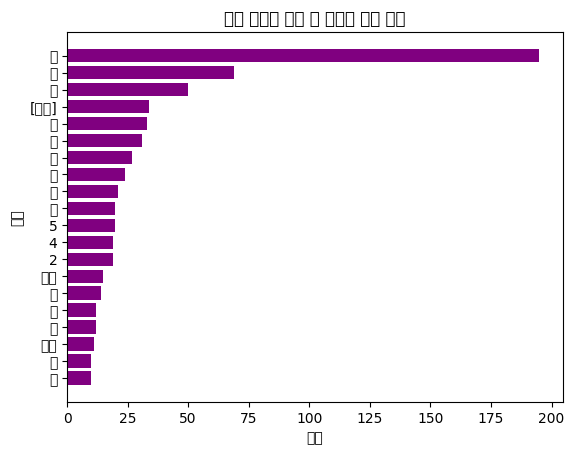

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50780 (\N{HANGUL SYLLABLE WAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


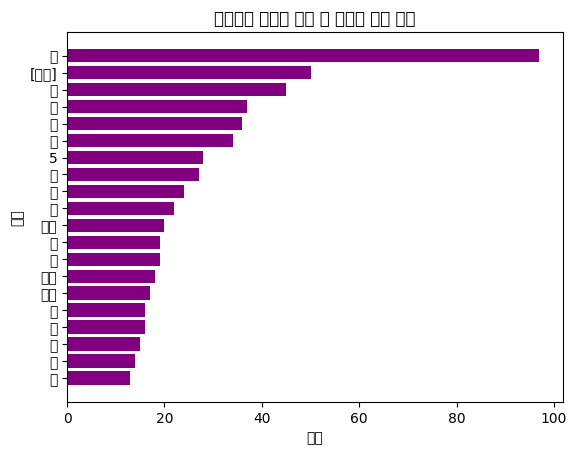

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


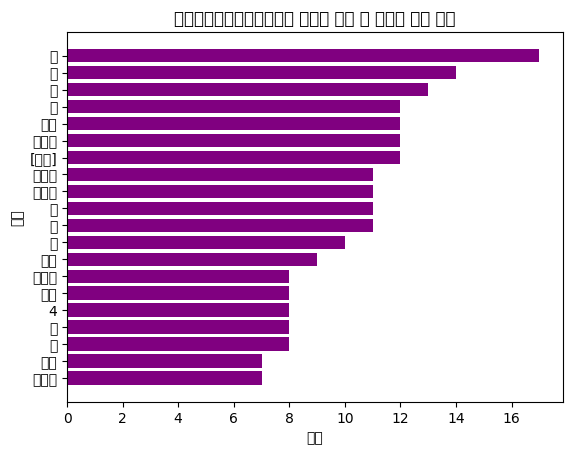

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46523 (\N{HANGUL SYLLABLE DDEOH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51593 (\N{HANGUL SYLLABLE JEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


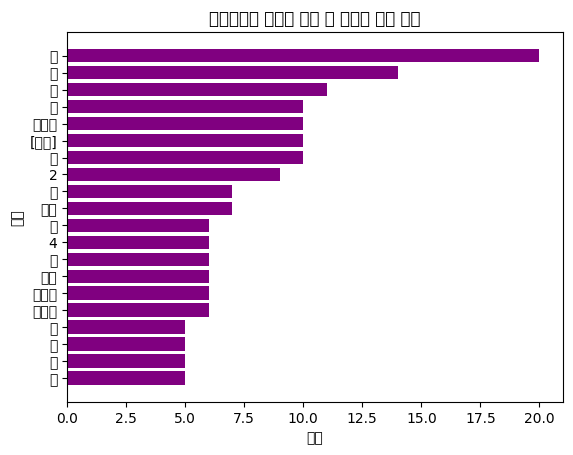

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49832 (\N{HANGUL SYLLABLE SEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


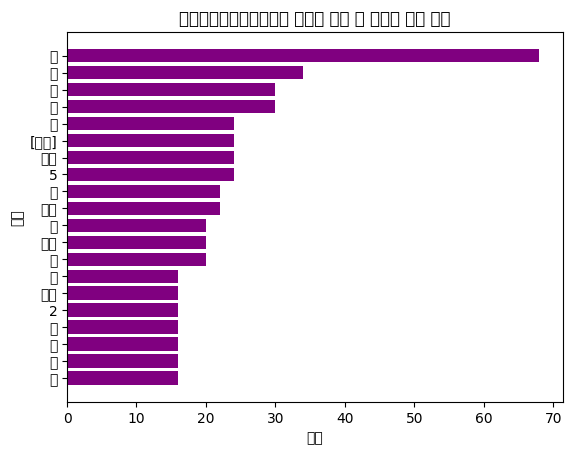

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46500 (\N{HANGUL SYLLABLE DDEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46104 (\N{HANGUL SYLLABLE DOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

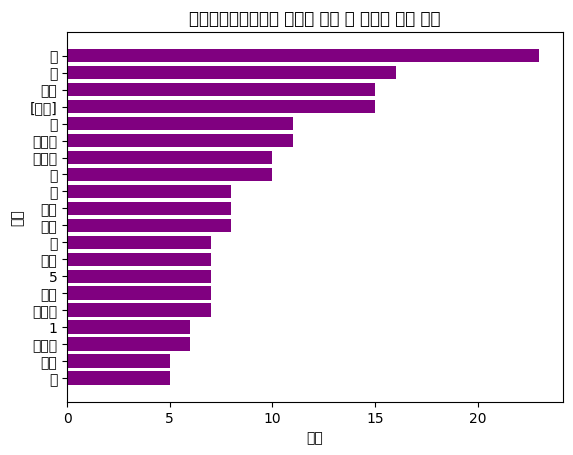

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

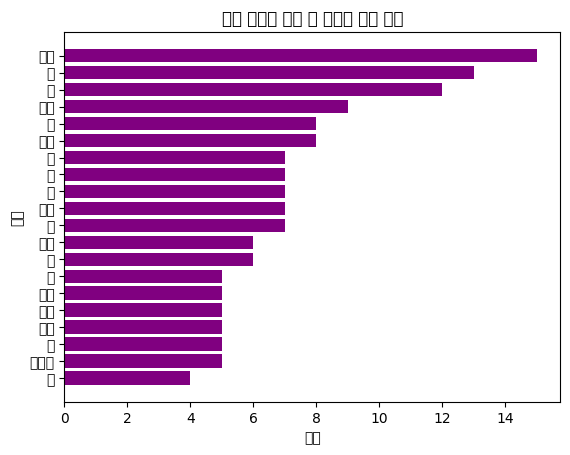

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45348 (\N{HANGUL SYLLABLE NE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47803 (\N{HANGUL SYLLABLE MOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


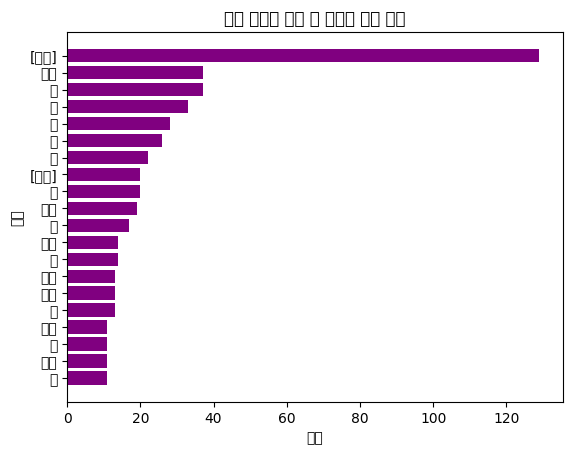

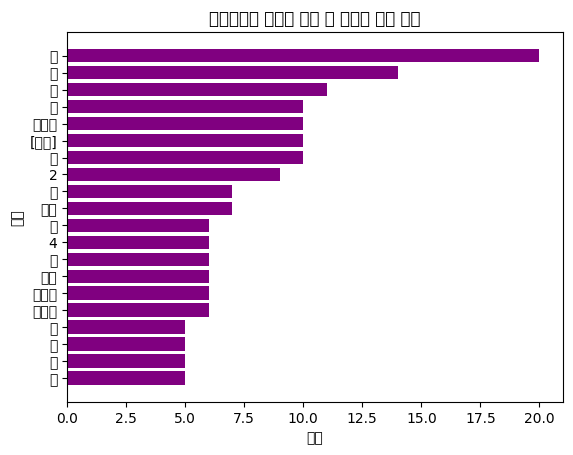

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45328 (\N{HANGUL SYLLABLE NEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50506 (\N{HANGUL SYLLABLE ANH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50520 (\N{HANGUL SYLLABLE ASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44176 (\N{HANGUL SYLLABLE GEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

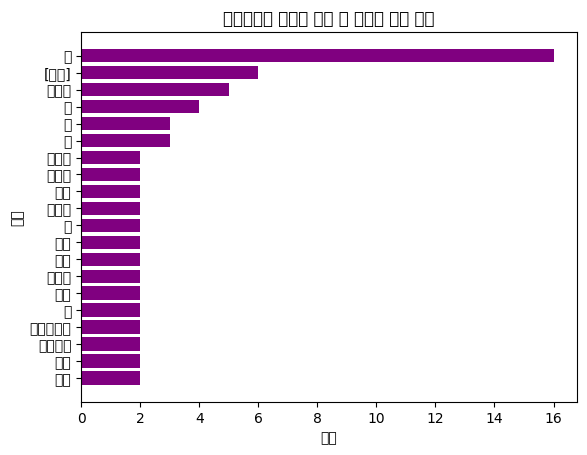

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47100 (\N{HANGUL SYLLABLE REOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46412 (\N{HANGUL SYLLABLE DDAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


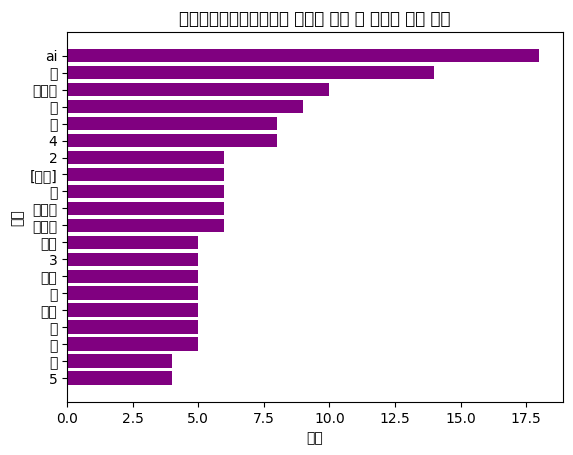

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50980 (\N{HANGUL SYLLABLE YUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


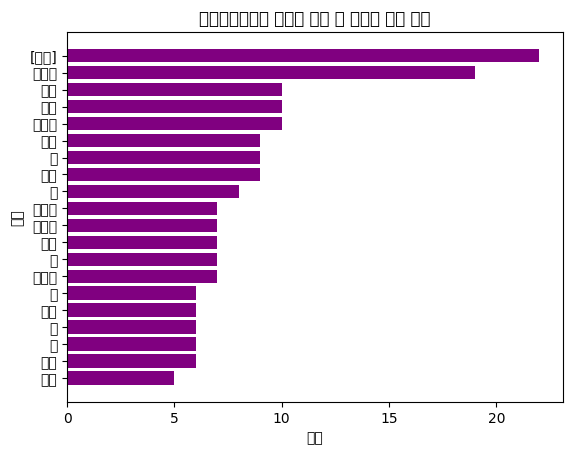

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44537 (\N{HANGUL SYLLABLE GEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


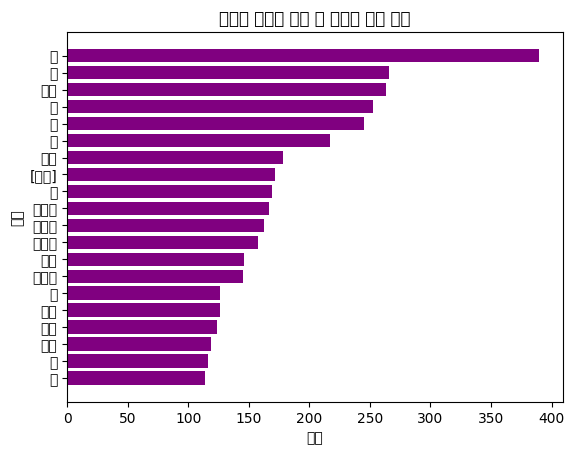

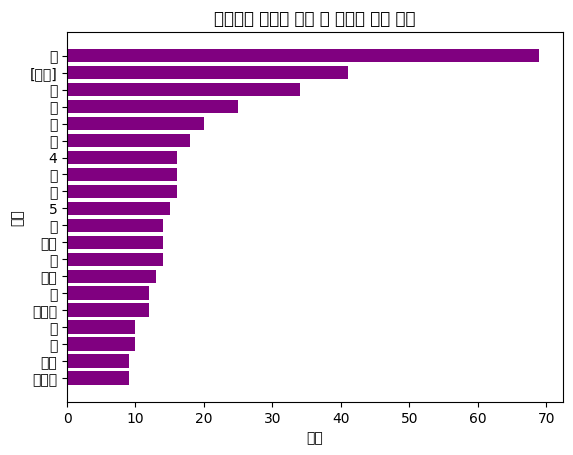

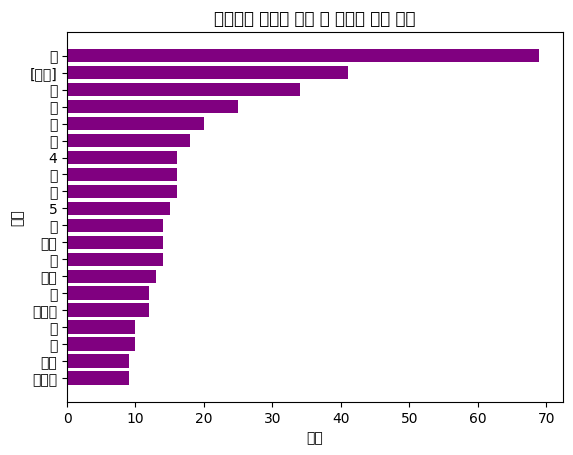

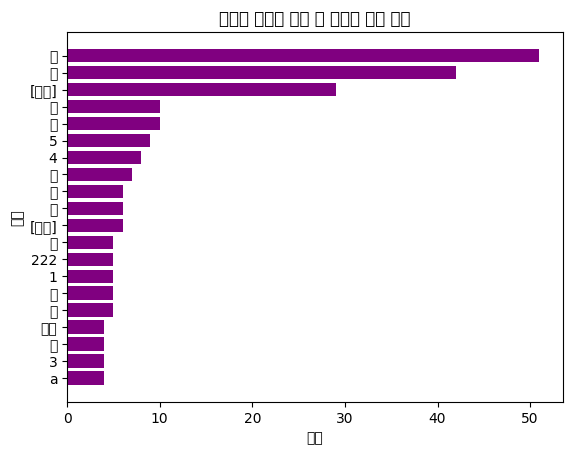

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47956 (\N{HANGUL SYLLABLE MWEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


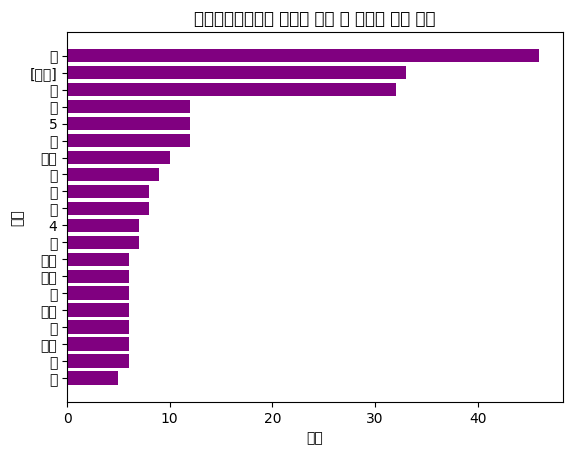

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


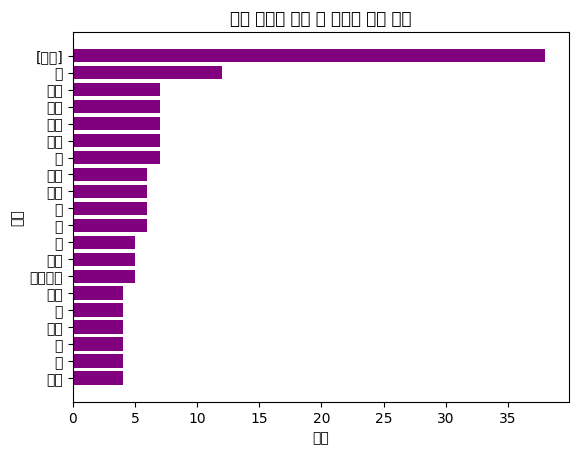

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


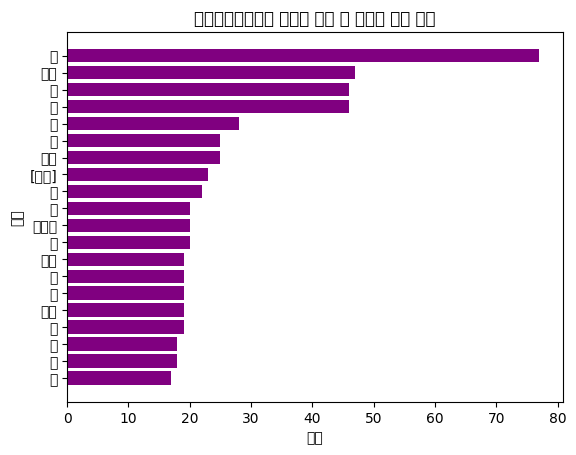

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46121 (\N{HANGUL SYLLABLE DOEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47088 (\N{HANGUL SYLLABLE REON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pac

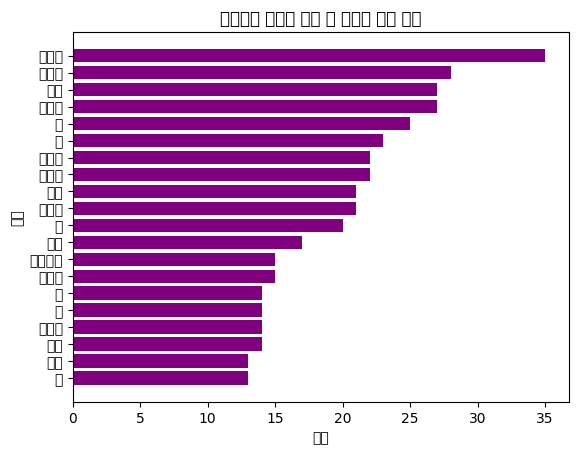

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45285 (\N{HANGUL SYLLABLE NYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


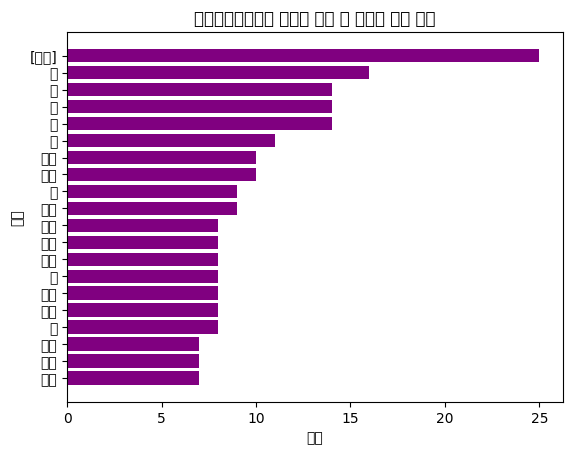

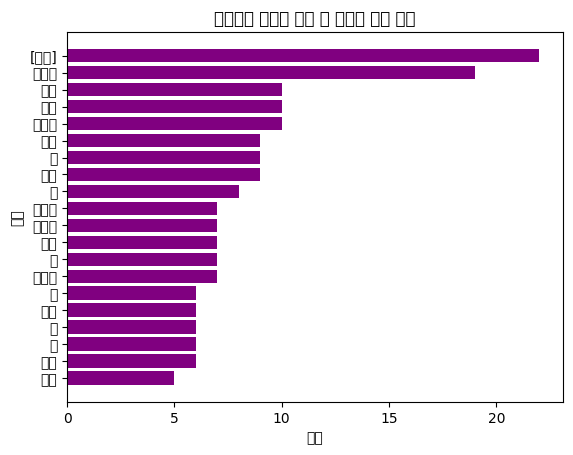

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44057 (\N{HANGUL SYLLABLE GAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


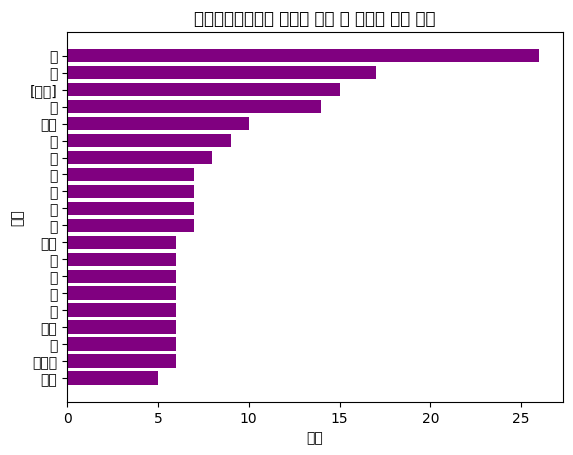

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


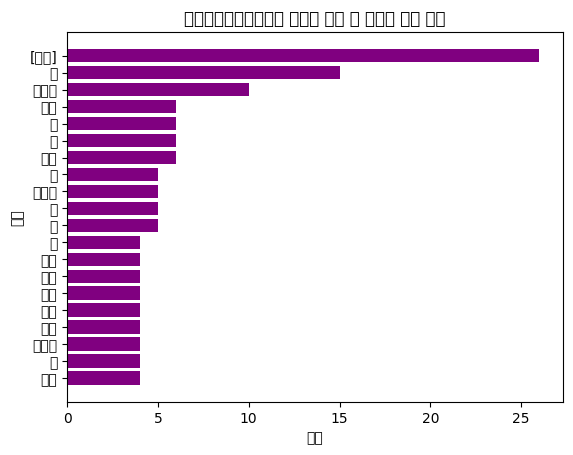

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


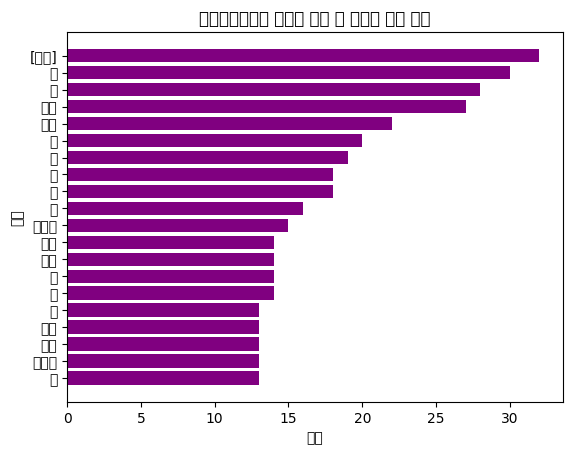

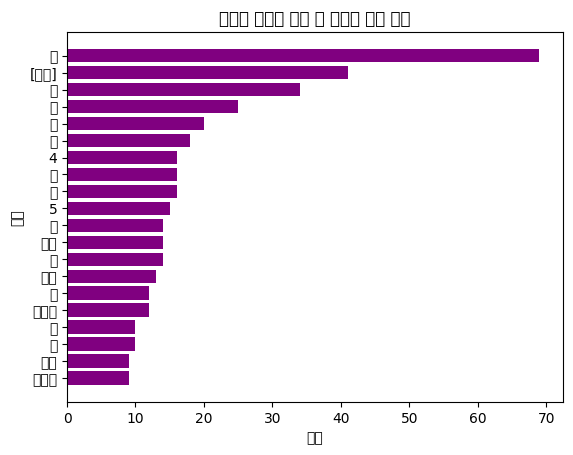

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49453 (\N{HANGUL SYLLABLE SEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48036 (\N{HANGUL SYLLABLE MYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


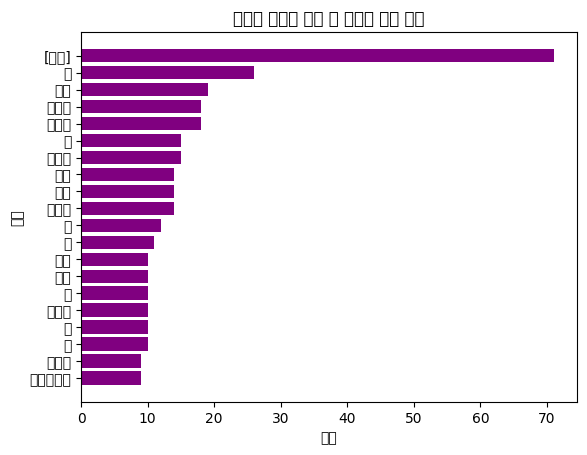

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51424 (\N{HANGUL SYLLABLE JYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47728 (\N{HANGUL SYLLABLE MYEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


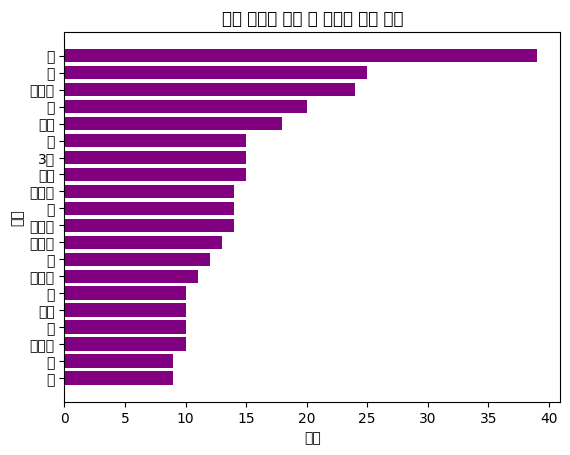

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45212 (\N{HANGUL SYLLABLE NAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47566 (\N{HANGUL SYLLABLE MANH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


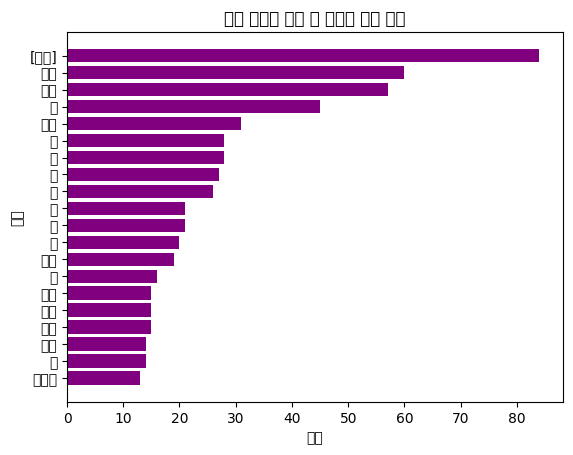

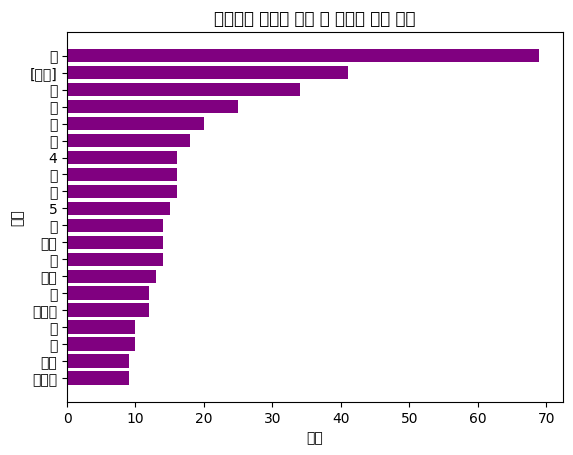

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


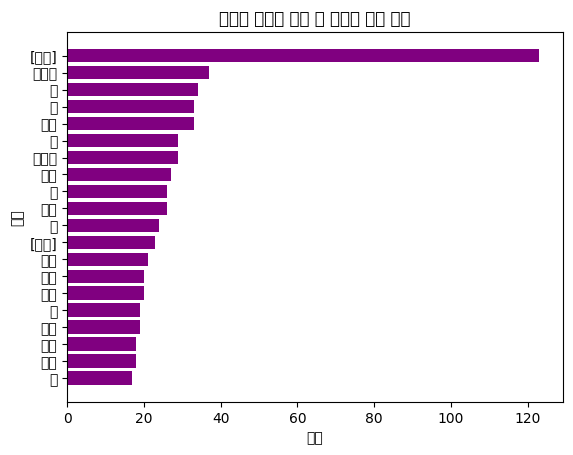

In [19]:
unique_dramas = dragon_drama_script['drama_name'].unique()

for drama in unique_dramas:
    words = ' '.join(dragon_drama_script[dragon_drama_script['drama_name'] == drama]['Text_script']).split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(20)
    word_labels, word_values = zip(*common_words)
    plt.barh(word_labels, word_values, color='purple')
    plt.xlabel('빈도')
    plt.ylabel('단어')
    plt.title(f'{drama} 줄거리 영상 속 출연이 높은 단어')
    plt.gca().invert_yaxis()
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

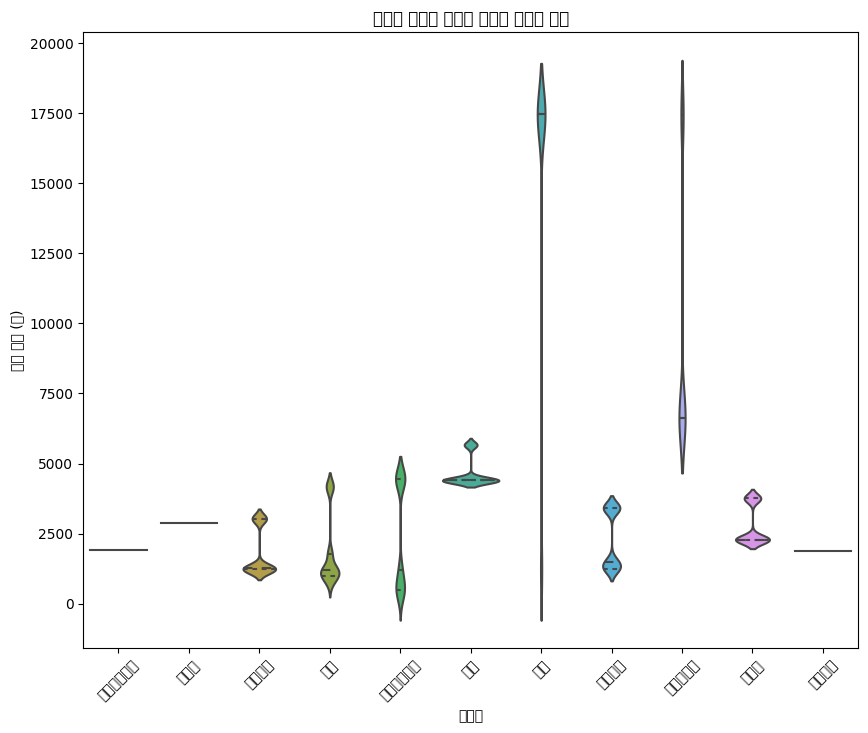

In [20]:
# 바이올린 플롯
# 영상 시간을 초 단위로 변환
dragon_drama_script['video_time_seconds'] = dragon_drama_script['video_time'].apply(time_to_seconds)

# 바이올린 플롯으로 시각화
plt.figure(figsize=(10,8))  # 그래프 크기 조정
sns.violinplot(x='channel_name', y='video_time_seconds', data=dragon_drama_script, inner='quartile')
plt.xlabel('채널명')
plt.ylabel('영상 시간 (초)')
plt.title('드라마 줄거리 채널별 영상의 시간별 분포')
plt.xticks(rotation=45)  # x축 레이블 회전 (채널명이 겹치는 것을 방지)
plt.show()

- 대부분의 채널들은 0초 ~2500초 사이의 영상을 주로 제공하며, 이 구간의 데이터 밀도가 가장 높다. 해당 채널들은 영화와드라마, 달빛뮤, 달빛뮤즈, 고몽, 티비앤드라마,디글, 캡틴라미,공작왕,신기누설이 있다.

- 구불, 어바웃타임은 1500초 이상의 영상 길이도 있으며, 이 시간의 영상은 주로 없다. 특히 구불은 1500초 이상의 영상 길이를 주로 제공하며, 어바웃타임은 1500초 이상, 5000~7500초 사이의 영상을 제공한다.

### 데이터 탐색 시각화 n-gram  ( 다른 드라마도 시각화 해주세요 )

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44152 (\N{HANGUL SYLLABLE GEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

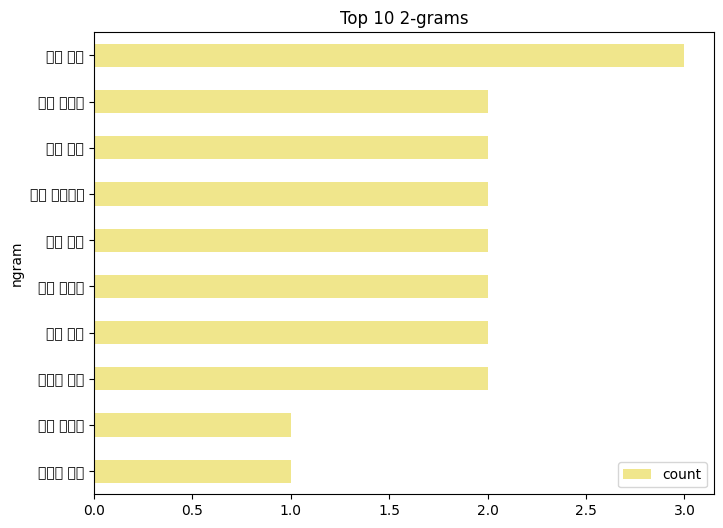

In [21]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/괴이_달빛뮤즈.csv')
texts = df['Text_script'].tolist()  # 'text_column_name'은 당신의 텍스트 데이터 컬럼명으로 변경해야 합니다.

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

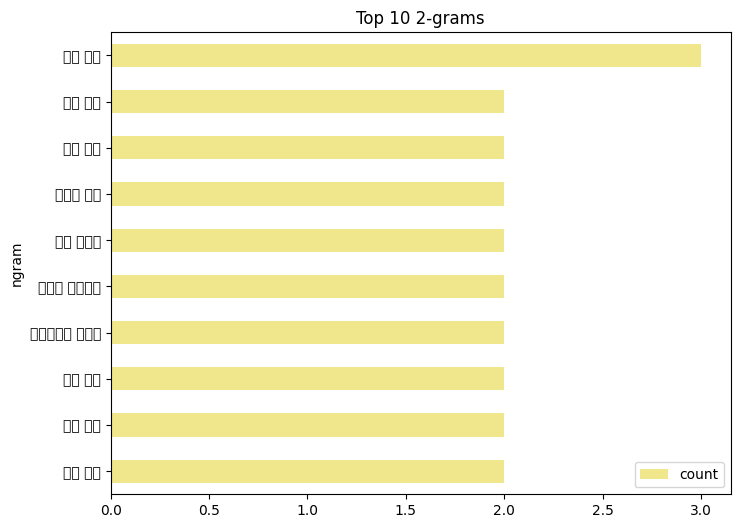

In [22]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/갯마을차차차_영화와드라마.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49832 (\N{HANGUL SYLLABLE SEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

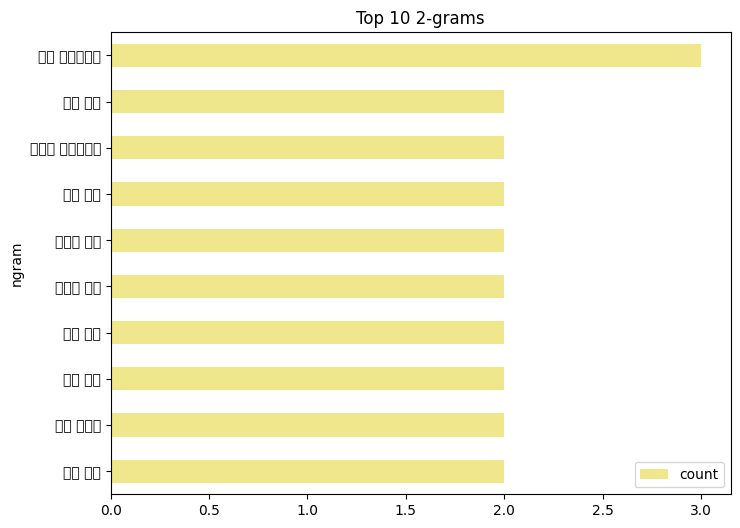

In [23]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/나빌레라_달빛뮤즈.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

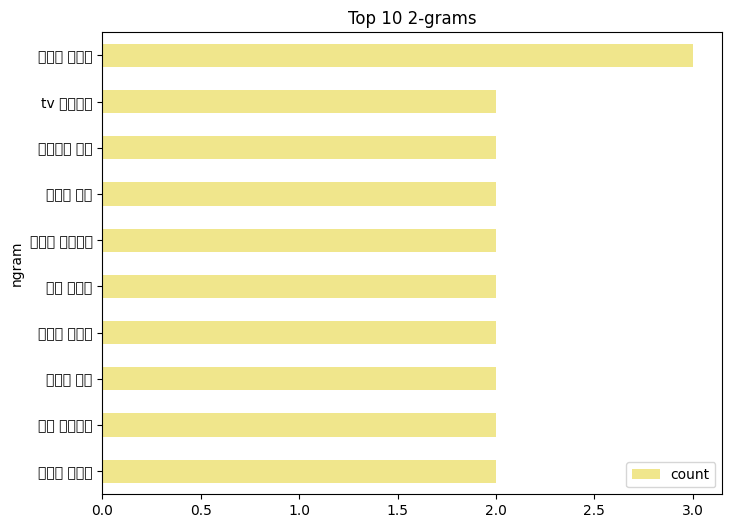

In [24]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/당신의운명을쓰고있습니다_고몽.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47085 (\N{HANGUL SYLLABLE REOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52377 (\N{HANGUL SYLLABLE CEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

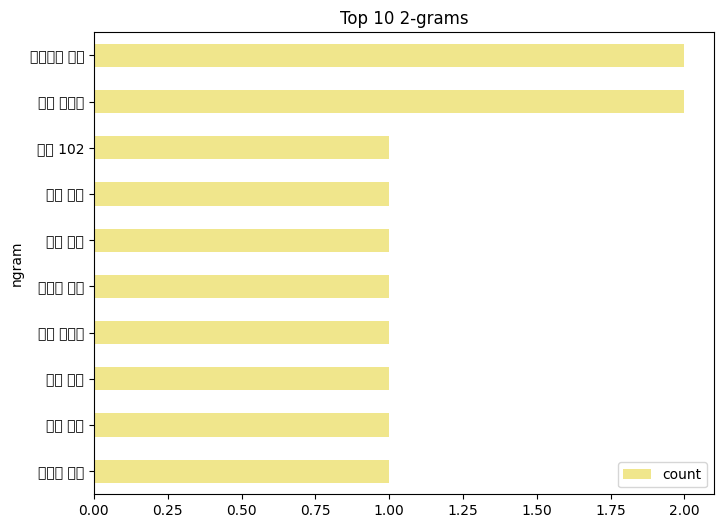

In [25]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/덕구이즈백_고몽.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

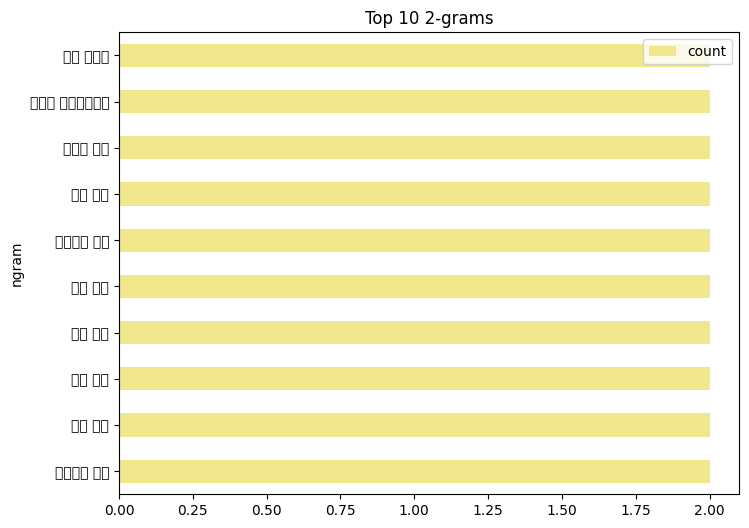

In [26]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/링크먹고사랑하라죽이게_고몽.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47952 (\N{HANGUL SYLLABLE MWEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47111 (\N{HANGUL SYLLABLE REOH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

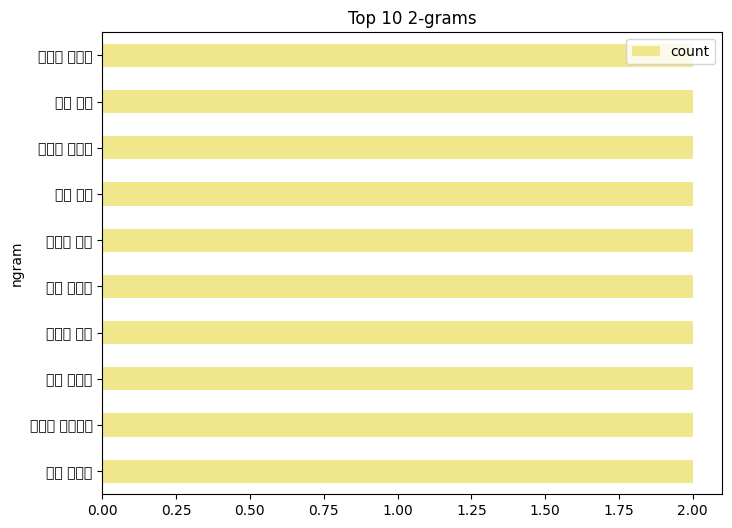

In [27]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/마녀식당으로오세요_고몽.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

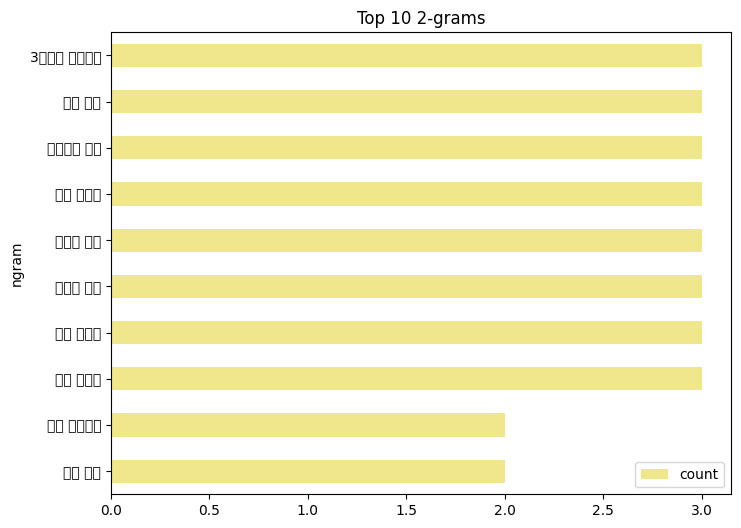

In [28]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/마인_티비앤드라마.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50865 (\N{HANGUL SYLLABLE UG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48736 (\N{HANGUL SYLLABLE BBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPytho

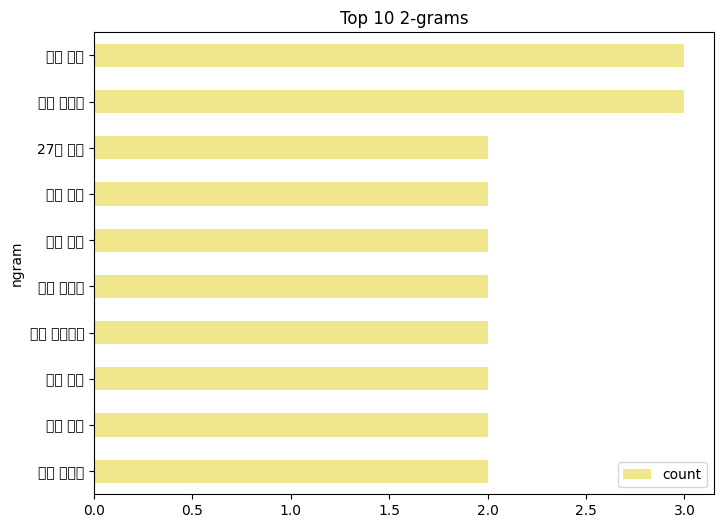

In [29]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/미씽_디글.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47085 (\N{HANGUL SYLLABLE REOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52377 (\N{HANGUL SYLLABLE CEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

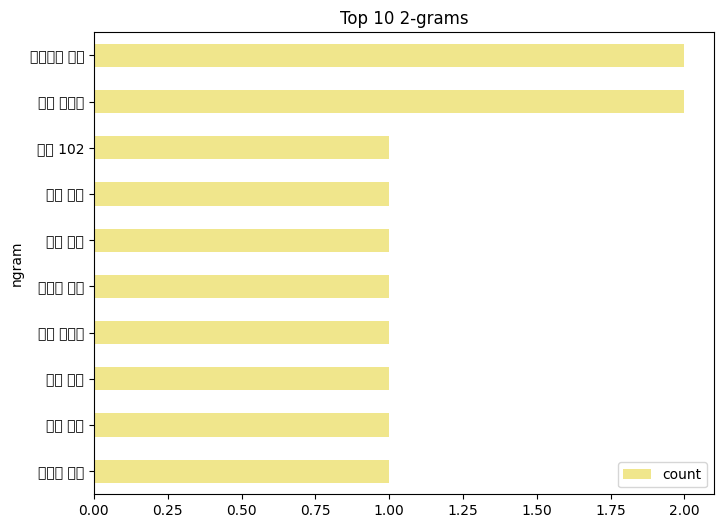

In [30]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/민트컨디션_고몽.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50956 (\N{HANGUL SYLLABLE WIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50628 (\N{HANGUL SYLLABLE EOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

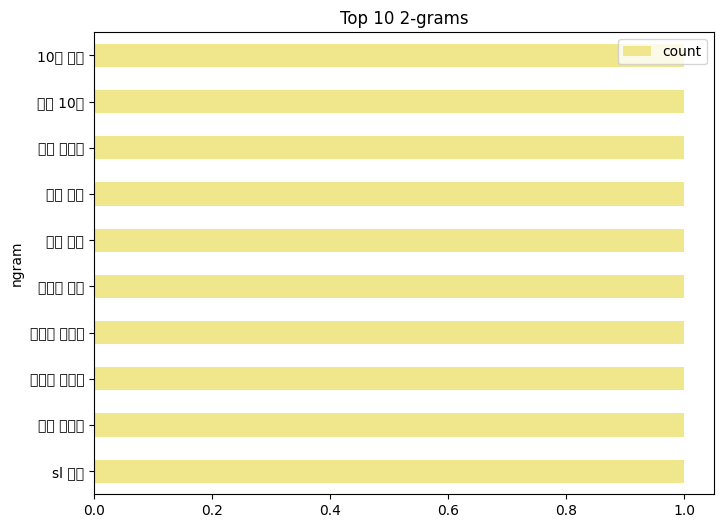

In [31]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/바벨신드롬_티비앤드라마.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

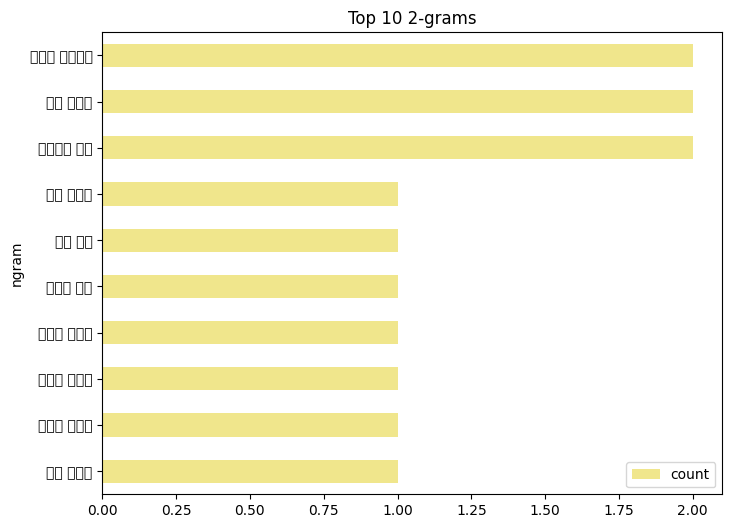

In [32]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/박성실씨의사차산업혁명_고몽.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46104 (\N{HANGUL SYLLABLE DOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

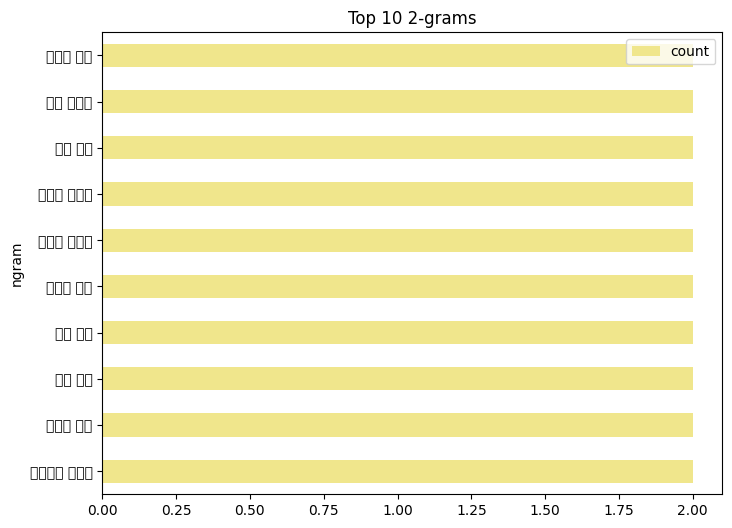

In [33]:
# n -gram
# 바 차트를 사용하여 데이터 내에서 가장 자주 등장하는 2-3 단어 조합(n-gram)을 시각화하여, 텍스트의 주요 표현이나 패턴을 파악할 수 있습니다.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/배드앤크레이지_고몽.csv')
texts = df['Text_script'].tolist()

def plot_top_ngrams(texts, n=2, top=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # 상위 n-grams만 선택
    common_words = words_freq[:top]
    df_ngram = pd.DataFrame(common_words, columns=['ngram', 'count'])

    # 바 차트 시각화
    df_ngram.sort_values(by='count').plot.barh(x='ngram', y='count', figsize=(8, 6), color='khaki')
    plt.title(f'Top {top} {n}-grams')
    plt.show()

# 2-gram (bigram) 분석
plot_top_ngrams(texts, n=2)

# 3-gram (trigram) 분석 (원한다면)
# plot_top_ngrams(texts, n=3)

# ■ dragon_drama_script 전처리

- 전처리
- 토큰화
- 데이터 분할 (dragon_drama_script 데이터 분할 후 train_labels가 없으면,label을넣어주세요.)

 ( 라벨을 넣는 방법 : bert의 기능을 사용해서 dragon_drama_selected 컬럼 emotion_label의 값들은  dragon_drama_selected 의 Text_script를 final_comments2 의 emotion_label과 emotion_label을 참고해서 판단해서 ,  train_labels를 넣는다. )




 cf. 전이학습 2 단계

- 파인 튜닝 실시 ( 교차 엔트로피 오차+ 하이퍼 파라미터 )
- 학습


In [34]:
dragon_drama_script.head()

Start_script  End_script           Text_script drama_name channel_name  \
0         0.000        2.40                     으     갯마을차차차       영화와드라마   
1         0.000        2.40                  [음악]     갯마을차차차       영화와드라마   
2         2.889        7.15  여기 아름다운 외모와 실력까지 겸비한     갯마을차차차       영화와드라마   
3         5.260       13.59           미모의 치과 사해 짐     갯마을차차차       영화와드라마   
4         7.150       14.73                  [음악]     갯마을차차차       영화와드라마   

  video_time  video_time_seconds predicted_label  
0      31:58                1918                  
1      31:58                1918                  
2      31:58                1918                  
3      31:58                1918                  
4      31:58                1918

In [35]:
# 컬럼 이름 변경
dragon_drama_selected = dragon_drama_script.rename(columns={'predicted_label': 'emotion_label'})

In [36]:
dragon_drama_selected.head()

Start_script  End_script           Text_script drama_name channel_name  \
0         0.000        2.40                     으     갯마을차차차       영화와드라마   
1         0.000        2.40                  [음악]     갯마을차차차       영화와드라마   
2         2.889        7.15  여기 아름다운 외모와 실력까지 겸비한     갯마을차차차       영화와드라마   
3         5.260       13.59           미모의 치과 사해 짐     갯마을차차차       영화와드라마   
4         7.150       14.73                  [음악]     갯마을차차차       영화와드라마   

  video_time  video_time_seconds emotion_label  
0      31:58                1918                
1      31:58                1918                
2      31:58                1918                
3      31:58                1918                
4      31:58                1918

In [37]:
# 데이터 정제  ( ★ 교수님 언급 , 필요 )

def clean_text(text):
    # HTML 태그 제거
    text = re.sub(r'<.*?>', '', text)

    # 괄호 안의 텍스트 제거 (예: [음악])
    text = re.sub(r'\[.*?\]', '', text)

    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)

    # 연속된 공백을 하나의 공백으로 변환
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

dragon_drama_selected['Text_script'] = dragon_drama_selected['Text_script'].apply(clean_text)

In [38]:
dragon_drama_selected.head()

Start_script  End_script           Text_script drama_name channel_name  \
0         0.000        2.40                     으     갯마을차차차       영화와드라마   
1         0.000        2.40                           갯마을차차차       영화와드라마   
2         2.889        7.15  여기 아름다운 외모와 실력까지 겸비한     갯마을차차차       영화와드라마   
3         5.260       13.59           미모의 치과 사해 짐     갯마을차차차       영화와드라마   
4         7.150       14.73                           갯마을차차차       영화와드라마   

  video_time  video_time_seconds emotion_label  
0      31:58                1918                
1      31:58                1918                
2      31:58                1918                
3      31:58                1918                
4      31:58                1918

In [39]:
# 2. 토큰화 : bert를 토크나이저를 사용하여 처리

from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []

    for text in texts:
        text = tokenizer.tokenize(text)
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)

        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len

        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)

    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

max_len = 250
tokens, masks, segments = bert_encode(dragon_drama_selected['Text_script'], tokenizer, max_len)


# ■ 감정 모델 학습 준비

In [40]:
하이퍼파라미터 설정: 모델 학습을 위한 중요한 매개변수들을 설정합니다. 이러한 값들은 모델의 학습 속도, 안정성 및 최종 성능에 영향을 줍니다.
BATCH_SIZE = 32  # 한 번에 처리할 데이터 샘플의 수를 설정합니다. 이는 메모리 사용량과 학습 속도에 영향을 줍니다.
EPOCHS = 3  # 전체 데이터셋에 대해 학습을 반복할 횟수를 설정합니다.
LEARNING_RATE = 2e-5  # 모델의 가중치를 조정하는 속도를 설정합니다. 너무 높으면 학습이 불안정해질 수 있고, 너무 낮으면 학습이 잘 이루어지지 않을 수 있습니다.
WARMUP_STEPS = int(0.1 * len(tokens) / BATCH_SIZE)  # 학습 초기에 학습률을 점진적으로 증가시킬 단계의 수를 설정합니다. 이는 학습 초기에 모델을 안정화시키는 데 도움을 줍니다.

# 데이터 분할: 학습 데이터와 검증 데이터를 분리합니다. 이렇게 분리하여 모델의 일반화 성능을 평가할 수 있습니다.
train_tokens, val_tokens, train_masks, val_masks, train_segments, val_segments, train_labels, val_labels = train_test_split(
    tokens, masks, segments, dragon_drama_selected['emotion_label'].values, test_size=0.2
    # 학습 데이터의 80%, 검증 데이터의 20%를 분할합니다.
)

# 모델 설정: 특정 태스크에 맞게 사전 훈련된 BERT 모델을 불러오고, 분류할 라벨의 수를 설정합니다.
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)  # 이진 분류를 가정하고 모델을 초기화합니다.

# 옵티마이저 설정: 모델의 가중치를 업데이트하는 방법을 설정합니다. AdamW는 가중치 감소를 포함하는 Adam 옵티마이저의 변형입니다.
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
# 학습 스케줄러 설정: 학습률을 동적으로 조정하여 특정 스텝마다 학습률을 업데이트합니다.
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=WARMUP_STEPS, num_training_steps=len(tokens) / BATCH_SIZE * EPOCHS)
# 손실 함수 설정: 모델의 예측과 실제 라벨 사이의 차이를 계산하는 함수입니다.
loss_fn = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수입니다.


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# ■ 감정 모델 학습 전 재 전처리

In [41]:
# BERT 토크나이징 과정에서 모든 시퀀스의 길이를 동일하게 맞추기 위해 패딩이 추가되야함.

print(train_tokens.shape)
print(train_masks.shape)
print(train_segments.shape)
print(train_labels.shape)


(21144, 250)
(21144, 250)
(21144, 250)
(21144,)


In [42]:
print(type(train_tokens[0]))
print(type(train_masks[0]))
print(type(train_segments[0]))
print(type(train_labels[0]))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'str'>


In [43]:
print(set(train_labels))

#set(train_labels)는 train_labels에 있는 모든 고유한 값들을 보여주는 집합(set)을 생성합니다.
# 출력에서 {''}를 보았다는 것은 train_labels에 빈 문자열(empty string) 값이 하나 이상 포함되어 있음을 의미합니다.

{''}


In [44]:
# 빈 문자열이 아닌 값들을 확인
non_empty_labels = [label for label in train_labels if label != '']
print("Non-empty labels:", set(non_empty_labels))

# 빈 문자열인 것들의 개수를 파악
empty_string_count = sum(1 for label in train_labels if label == '')
print("Number of empty strings:", empty_string_count)


Non-empty labels: set()
Number of empty strings: 21144


In [45]:
# train_labels의 데이터 형태 확인
print(train_labels.shape)
print(type(train_labels[0]))
print(train_labels[:10])


(21144,)
<class 'str'>
['' '' '' '' '' '' '' '' '' '']


In [46]:
final_comments2.head()

author                                               text  \
0             박중근      2:49 왕따일수 없는 이유: 남편이 전요환 잡은 강인구(최창호가 안 도와줬나?)   
1      루돌프사슴코는빨간코                               요즘 누구 주위에 자살죽음 비슷하군.   
2  Maison de MiHo  강아지 광고가 더 감동~~~\n제가 그런 아이와 살고 있어서 ㅎ\n저희도 추운 겨울...   
3            MC댕댕                                            와 개꿀잼이네   
4          stella               오인경 너무 앵앵거려요... 목소리 좀 역할에 맞게 해주세여 ..   

           published_at drama_name channel_name    year  emotion_label  
0  2023-04-15T15:10:36Z      작은아씨들          김시선  2023.0              3  
1  2023-03-11T10:29:47Z      작은아씨들          김시선  2023.0             10  
2  2022-10-19T11:36:25Z      작은아씨들          김시선  2023.0             54  
3  2022-10-01T05:09:02Z      작은아씨들          김시선  2023.0             54  
4  2022-09-26T10:55:29Z      작은아씨들          김시선  2023.0              3

In [47]:
dragon_drama_selected.head()

Start_script  End_script           Text_script drama_name channel_name  \
0         0.000        2.40                     으     갯마을차차차       영화와드라마   
1         0.000        2.40                           갯마을차차차       영화와드라마   
2         2.889        7.15  여기 아름다운 외모와 실력까지 겸비한     갯마을차차차       영화와드라마   
3         5.260       13.59           미모의 치과 사해 짐     갯마을차차차       영화와드라마   
4         7.150       14.73                           갯마을차차차       영화와드라마   

  video_time  video_time_seconds emotion_label  
0      31:58                1918                
1      31:58                1918                
2      31:58                1918                
3      31:58                1918                
4      31:58                1918

In [48]:
print(dragon_drama_selected['channel_name'].unique())

['영화와드라마' '달빛뮤' '달빛뮤즈' '고몽' '티비앤드라마' '디글' '구불' '캡틴라미' '어바웃타임' '공작왕' '신기누설']


In [49]:
print(final_comments2['channel_name'].unique())

['김시선' '티비앤드라마' '디글' '캡틴라미' '고몽' '어바웃타임' '에이비씨무비' '낭만무비의드라마영화리뷰' '샾잉'
 '무비랜드' '티비앤이앤티' '달빛뮤즈' '명작맛집' '구불' 'ㅌㅂㅌㅂ티비' '자취방남자' '리뷰헤는밤' '영화와드라마'
 '리얼무비' '공작왕티비' '제이전의드라마와레시피' '하리봉무비' '신기누설영화를그리다' '넷플릭스코리아' '공작왕'
 '티비앤이엔티' '지무비']


In [50]:
# dragon_drama_selected 데이터프레임의 고유한 채널 이름 목록
dragon_drama_channels = dragon_drama_selected['channel_name'].unique()

# final_comments2 데이터프레임에서 dragon_drama_channels에 없는 채널 이름을 가진 행 삭제
final_comments2 = final_comments2[final_comments2['channel_name'].isin(dragon_drama_channels)]

# 결과 확인
print(final_comments2.head())


             author                                               text  \
226             김시선      시즌2 보시기 전에, 이 영상 하나로 충분하게끔 구성했습니다. 재밌게 즐겨주세요!   
227       junos2010                             와 정말 고수님 압살 한다 너무 잘 생김   
228            쓰린콤보  미생도 미씽도 안봐서 아무 생각없이 유명한 그 미생인줄알고 보고 있었는데 친구가 말...   
229  Squares Bright                     안티는 아닌데.. 안소희 연기.. 몰입감 깨지는데 ㅠㅠ   
230            무쵸비엔  진짜 너무너무 재미있게 본 드라마인데...\n연기들도 넘 좋고  허준호 배우님 진짜...   

             published_at drama_name channel_name    year  emotion_label  
226  2022-12-13T05:30:52Z         미씽       티비앤드라마  2023.0             50  
227  2023-08-12T02:19:57Z         미씽       티비앤드라마  2023.0             55  
228  2023-08-09T03:58:20Z         미씽       티비앤드라마  2023.0             54  
229  2023-08-08T09:28:25Z         미씽       티비앤드라마  2023.0             28  
230  2023-07-14T10:44:00Z         미씽       티비앤드라마  2023.0             28  


In [51]:
print(dragon_drama_selected['channel_name'].unique())

['영화와드라마' '달빛뮤' '달빛뮤즈' '고몽' '티비앤드라마' '디글' '구불' '캡틴라미' '어바웃타임' '공작왕' '신기누설']


In [52]:
print(final_comments2['channel_name'].unique())

['티비앤드라마' '디글' '캡틴라미' '고몽' '어바웃타임' '달빛뮤즈' '구불' '영화와드라마' '공작왕']


In [53]:
# '신기누설'과 '달빛뮤'를 제외한 채널 이름을 가진 행만 선택
dragon_drama_selected = dragon_drama_selected[(dragon_drama_selected['channel_name'] != '신기누설') & (dragon_drama_selected['channel_name'] != '달빛뮤')& (dragon_drama_selected['channel_name'] != '달빛뮤즈')]

# 결과 확인
print(dragon_drama_selected.head())


   Start_script  End_script           Text_script drama_name channel_name  \
0         0.000        2.40                     으     갯마을차차차       영화와드라마   
1         0.000        2.40                           갯마을차차차       영화와드라마   
2         2.889        7.15  여기 아름다운 외모와 실력까지 겸비한     갯마을차차차       영화와드라마   
3         5.260       13.59           미모의 치과 사해 짐     갯마을차차차       영화와드라마   
4         7.150       14.73                           갯마을차차차       영화와드라마   

  video_time  video_time_seconds emotion_label  
0      31:58                1918                
1      31:58                1918                
2      31:58                1918                
3      31:58                1918                
4      31:58                1918                


In [54]:
print(dragon_drama_selected['channel_name'].unique())

['영화와드라마' '고몽' '티비앤드라마' '디글' '구불' '캡틴라미' '어바웃타임' '공작왕']


In [55]:
print(final_comments2['channel_name'].unique())

['티비앤드라마' '디글' '캡틴라미' '고몽' '어바웃타임' '달빛뮤즈' '구불' '영화와드라마' '공작왕']


In [56]:
final_comments2 = final_comments2[(final_comments2['channel_name'] != '신기누설') & (final_comments2['channel_name'] != '달빛뮤')]


In [57]:
final_comments2.head()

author                                               text  \
226             김시선      시즌2 보시기 전에, 이 영상 하나로 충분하게끔 구성했습니다. 재밌게 즐겨주세요!   
227       junos2010                             와 정말 고수님 압살 한다 너무 잘 생김   
228            쓰린콤보  미생도 미씽도 안봐서 아무 생각없이 유명한 그 미생인줄알고 보고 있었는데 친구가 말...   
229  Squares Bright                     안티는 아닌데.. 안소희 연기.. 몰입감 깨지는데 ㅠㅠ   
230            무쵸비엔  진짜 너무너무 재미있게 본 드라마인데...\n연기들도 넘 좋고  허준호 배우님 진짜...   

             published_at drama_name channel_name    year  emotion_label  
226  2022-12-13T05:30:52Z         미씽       티비앤드라마  2023.0             50  
227  2023-08-12T02:19:57Z         미씽       티비앤드라마  2023.0             55  
228  2023-08-09T03:58:20Z         미씽       티비앤드라마  2023.0             54  
229  2023-08-08T09:28:25Z         미씽       티비앤드라마  2023.0             28  
230  2023-07-14T10:44:00Z         미씽       티비앤드라마  2023.0             28

In [58]:
print(final_comments2.columns)


Index(['author', 'text', 'published_at', 'drama_name', 'channel_name', 'year',
       'emotion_label'],
      dtype='object')


In [59]:
print(dragon_drama_selected.columns)


Index(['Start_script', 'End_script', 'Text_script', 'drama_name',
       'channel_name', 'video_time', 'video_time_seconds', 'emotion_label'],
      dtype='object')


In [60]:
# final_comments2 데이터프레임의 'channel_name' 컬럼에서 유니크한 값을 출력
print(final_comments2['channel_name'].unique())



['티비앤드라마' '디글' '캡틴라미' '고몽' '어바웃타임' '달빛뮤즈' '구불' '영화와드라마' '공작왕']


In [61]:

# dragon_drama_selected 데이터프레임의 'channel_name' 컬럼에서 유니크한 값을 출력
print(dragon_drama_selected['channel_name'].unique())


['영화와드라마' '고몽' '티비앤드라마' '디글' '구불' '캡틴라미' '어바웃타임' '공작왕']


In [62]:
# 중복된 행이 있는지 확인
print(final_comments2[final_comments2.duplicated()])

       author                                        text  \
3034  pha pha    두배우의 연기력 눈빛 감정선 어느것하나 버릴게 없는 최고의 서사였어요!!   
3035      j J                        뭐죠...\n이 갓벽한 편집본은 ㅜㅜ   
3036      전용열                        김서형씨. 연기도 잘하지만 매력있어요   
3037       다연                             이런 서사 찬성 ??????   
3038     캐니캐니                        두 사람의 서사와 연기가 너무 좋았던   
...       ...                                         ...   
6120     달보드레      술먹고 뛰어다니는사람이 제일노답인데... 여기서 그걸하넼ㅋㅋㅋㅋㅋㅋㅋ   
6121      이슬나          저런여우에게;홀리면,,부~럽쥐잉~~~??????????????   
6122      이슬나  기절하면;안되요!!!!!!!!"펑"~구미호 한마리~~~~~??????????   
6711      남로또                                           오   
6743       봄봄                                     내 인생드라마   

              published_at drama_name channel_name  year  emotion_label  
3034  2021-07-07T15:03:10Z  마녀식당으로오세요       티비앤드라마   NaN             54  
3035  2021-07-07T15:02:27Z  마녀식당으로오세요       티비앤드라마   NaN             54  
3036  2021-07-07T12:40:20Z  마녀식당으로오세요       티

In [63]:
print(dragon_drama_selected[dragon_drama_selected.duplicated()])

       Start_script  End_script           Text_script   drama_name  \
18645         0.900       4.520               설마 아니겠지  링크먹고사랑하라죽이게   
18646         5.370      12.440            다시는 이런 공부를  링크먹고사랑하라죽이게   
18647         8.610      12.440         겪고 싶지 않았는데 보다  링크먹고사랑하라죽이게   
18648        13.080      20.070        당연히 이마다 5대가 나야  링크먹고사랑하라죽이게   
18649        17.510      22.560              나 보고 싶었지  링크먹고사랑하라죽이게   
...             ...         ...                   ...          ...   
19118      1243.779    1251.880      종 모양을 요렇게 해주세요 포  링크먹고사랑하라죽이게   
19119      1248.460    1255.059  발표일 영화 이야기 최신 업로드 형사  링크먹고사랑하라죽이게   
19120      1251.880    1256.980   밟힌 뮤츠 추천영상 구독은 발표 내  링크먹고사랑하라죽이게   
19121      1255.059    1259.850         주에게 큰 힘이 된답니다  링크먹고사랑하라죽이게   
19122      1256.980    1259.850                   카 및  링크먹고사랑하라죽이게   

      channel_name video_time  video_time_seconds emotion_label  
18645           고몽      19:56                1196                
18646           고몽      19:

In [64]:
# final_comments2 데이터프레임에서 중복된 행 제거
final_comments2 = final_comments2.drop_duplicates()

# dragon_drama_selected 데이터프레임에서 중복된 행 제거
dragon_drama_selected = dragon_drama_selected.drop_duplicates()


In [65]:
print(dragon_drama_selected['channel_name'].unique())
print(final_comments2['channel_name'].unique())


['영화와드라마' '고몽' '티비앤드라마' '디글' '구불' '캡틴라미' '어바웃타임' '공작왕']
['티비앤드라마' '디글' '캡틴라미' '고몽' '어바웃타임' '달빛뮤즈' '구불' '영화와드라마' '공작왕']


In [66]:
final_comments2 = final_comments2[final_comments2['channel_name'].isin(['티비앤드라마', '디글', '캡틴라미', '고몽', '어바웃타임', '구불'])]

In [67]:
final_comments2.head()

author                                               text  \
226             김시선      시즌2 보시기 전에, 이 영상 하나로 충분하게끔 구성했습니다. 재밌게 즐겨주세요!   
227       junos2010                             와 정말 고수님 압살 한다 너무 잘 생김   
228            쓰린콤보  미생도 미씽도 안봐서 아무 생각없이 유명한 그 미생인줄알고 보고 있었는데 친구가 말...   
229  Squares Bright                     안티는 아닌데.. 안소희 연기.. 몰입감 깨지는데 ㅠㅠ   
230            무쵸비엔  진짜 너무너무 재미있게 본 드라마인데...\n연기들도 넘 좋고  허준호 배우님 진짜...   

             published_at drama_name channel_name    year  emotion_label  
226  2022-12-13T05:30:52Z         미씽       티비앤드라마  2023.0             50  
227  2023-08-12T02:19:57Z         미씽       티비앤드라마  2023.0             55  
228  2023-08-09T03:58:20Z         미씽       티비앤드라마  2023.0             54  
229  2023-08-08T09:28:25Z         미씽       티비앤드라마  2023.0             28  
230  2023-07-14T10:44:00Z         미씽       티비앤드라마  2023.0             28

In [68]:

# 'Text_script' 열의 결측값을 제거
final_comments2 = final_comments2.dropna(subset=['text'])

# 다른 열의 결측값을 채우거나 제거하는 경우에 대한 예시
# final_comments2 = final_comments2.fillna({'emotion_label': 0})
# final_comments2 = final_comments2.dropna()


import re

# 특수 문자 및 숫자 제거
final_comments2['text'] = final_comments2['text'].apply(lambda x: re.sub(r'[^a-zA-Z가-힣\s]', '', x))

# 소문자로 변환
final_comments2['text'] = final_comments2['text'].str.lower()

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize




In [69]:

# 'Text_script' 열의 결측값을 제거
dragon_drama_selected.dropna(subset=['Text_script'], inplace=True)

# 다른 열의 결측값을 채우거나 제거하는 경우
# 여기서는 'emotion_label' 열의 결측값을 0으로 채우는 예시
dragon_drama_selected['emotion_label'].fillna(0, inplace=True)

# 특수 문자 및 숫자 제거
dragon_drama_selected['Text_script'] = dragon_drama_selected['Text_script'].str.replace('[^a-zA-Z가-힣\s]', '', regex=True)

# 소문자로 변환
dragon_drama_selected['Text_script'] = dragon_drama_selected['Text_script'].str.lower()


In [70]:
# 'channel_name'과 'Text_script' 열을 기준으로 두 데이터프레임을 병합
merged_df = dragon_drama_selected.merge(final_comments2, on=['channel_name'], how='inner')



In [71]:
merged_df.head()

Start_script  End_script                            Text_script  \
0         0.459       10.78  너 쓰는 명부 중에 로또당첨 귤 몇 퍼센트 명보 로또 인간은 말이야   
1         0.459       10.78  너 쓰는 명부 중에 로또당첨 귤 몇 퍼센트 명보 로또 인간은 말이야   
2         0.459       10.78  너 쓰는 명부 중에 로또당첨 귤 몇 퍼센트 명보 로또 인간은 말이야   
3         0.459       10.78  너 쓰는 명부 중에 로또당첨 귤 몇 퍼센트 명보 로또 인간은 말이야   
4         0.459       10.78  너 쓰는 명부 중에 로또당첨 귤 몇 퍼센트 명보 로또 인간은 말이야   

   drama_name_x channel_name video_time  video_time_seconds emotion_label_x  \
0  당신의운명을쓰고있습니다           고몽      18:58                1138                   
1  당신의운명을쓰고있습니다           고몽      18:58                1138                   
2  당신의운명을쓰고있습니다           고몽      18:58                1138                   
3  당신의운명을쓰고있습니다           고몽      18:58                1138                   
4  당신의운명을쓰고있습니다           고몽      18:58                1138                   

       author                                               text  \
0          선물  요즘 이 드라마 넷플에서 정주행중인데요 너무 잼있네요당시 시청률이 대라서 깜짝 놀랐...   
1         박용백  와 배우만 카메오로 캐스팅하는줄 알았는데 감독도 진짜 감독 본인이 까메오로 나올줄이...   
2   blue blue  마흔이 넘었다고 말도안돼 확실히 연예인이긴하다 미모 무슨일이야  이번 드라마에서 유...   
3  qwertyuiop                               조여정 진짜 사랑스럽다 드라마 재밌넹   
4          샷건                                      조여정 대 후반 아닌가요   

           published_at drama_name_y    year  emotion_label_y  
0  2023-03-13T09:53:41Z  연예인매니저로살아남기  2022.0               40  
1  2023-02-15T02:15:08Z  연예인매니저로살아남기  2022.0               55  
2  2023-01-26T11:34:24Z  연예인매니저로살아남기  2022.0               55  
3  2022-12-11T18:48:22Z  연예인매니저로살아남기  2022.0               54  
4  2022-12-05T06:26:03Z  연예인매니저로살아남기  2022.0               54

# ■ 감정 라벨링 정의

In [72]:
# 감정 라벨 딕셔너리 정의
emotion_label = {
    '분노': 0,
    '툴툴대는': 1,
    '좌절한': 2,
    '짜증나는': 3,
    '방어적인': 4,
    '악의적인': 5,
    '안달하는': 6,
    '구역질 나는': 7,
    '노여워하는': 8,
    '성가신': 9,
    '슬픔': 10,
    '실망한': 11,
    '비통한': 12,
    '후회되는': 13,
    '우울한': 14,
    '마비된': 15,
    '염세적인': 16,
    '눈물이 나는': 17,
    '낙담한': 18,
    '환멸을느끼는': 19,
    '불안': 20,
    '두려운': 21,
    '스트레스 받는': 22,
    '취약한': 23,
    '혼란스러운': 24,
    '당혹스러운': 25,
    '회의적인': 26,
    '걱정스러운': 27,
    '조심스러운': 28,
    '초조한': 29,
    '상처': 30,
    '질투하는': 31,
    '배신당한': 32,
    '고립된': 33,
    '충격받은': 34,
    '불운한': 35,
    '희생된': 36,
    '억울한': 37,
    '괴로워하는': 38,
    '버려진': 39,
    '당황': 40,
    '고립된(당황스러운)': 41,
    '남의 시선 의식하는': 42,
    '외로운': 43,
    '열등감': 44,
    '죄책감': 45,
    '부끄러운': 46,
    '혐오스러운': 47,
    '한심한': 48,
    '혼란스러운(당황스러운)': 49,
    '기쁨': 50,
    '감사하는': 51,
    '사랑하는': 52,
    '편안한': 53,
    '만족스러운': 54,
    '흥분되는': 55,
    '느긋한': 56,
    '안도하는': 57,
    '신이난': 58,
    '자신하는': 59,
}

# 'Text_script' 열을 기반으로 감정 라벨을 할당하는 함수
def assign_emotion_label(text):
    for emotion, label in emotion_label.items():
        if emotion in text:
            return label
    # 감정 라벨이 없는 경우, 기본 라벨을 할당하거나 처리 방법을 정의하세요.
    return -1  # 예: -1은 라벨이 없음을 나타냅니다.

# 'Text_script' 열을 기반으로 감정 라벨을 할당하여 'emotion_label_x' 열에 저장
merged_df['emotion_label_x'] = merged_df['Text_script'].apply(assign_emotion_label)

# ■ 감정 분석 및 결과

In [73]:
# 'emotion_label_x' 열에서 감정 라벨이 있는 경우 (0 이상)와 없는 경우 (-1)의 개수 세기
with_label_count = len(merged_df[merged_df['emotion_label_x'] >= 0])
without_label_count = len(merged_df[merged_df['emotion_label_x'] == -1])

# 결과 출력
print(f"감정 라벨이 있는 경우: {with_label_count}개")
print(f"감정 라벨이 없는 경우: {without_label_count}개")


감정 라벨이 있는 경우: 47447개
감정 라벨이 없는 경우: 11923136개


In [74]:
# 감정 라벨이 있는 경우만 필터링
emotion_labeled_df = merged_df[merged_df['emotion_label_x'] != -1]



# 필터링된 데이터프레임을 CSV 파일로 저장
emotion_labeled_df.to_csv('emotion_labeled_data.csv', index=False)


In [78]:
# CSV 파일로 저장
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/학위_10월/04. 유튜브 자막/merged_df.csv'
df.to_csv(csv_file_path, index=False)